# MKT Cycle (Bear and Bull) Model for Risk Aversion

This is a an update to the Market Cycle ML Prediction Model. The origional model was developed and published in 2020 on Github   
    * [Analyzing Bear and Bull Market Cycles with Python](https://aljgutier.github.io/posts/Pyquant%20Financial%20Market%20Model/20201231-MarketCycleML/)
    * [Market Cycle Prediction Model Data Anaysis](https://aljgutier.github.io/posts/Pyquant%20Financial%20Market%20Model/20200930-MarketCycle/)

Major Sections
  * Import ML Dataframe
  * ML Data Pre-Processing
  * Model Training - train with data up to Market High prior to Covid Bear
  * Confusion Matrix
  * Feature Importances
  * Feature Visualization
  * Visualize MCUPM Bear Risk Aversion
  * Backtest
  
Why an mcupm model 
  * Below it is found that the predictive model does a poor job of generalizing. 
  * However, the MCUPM model, based on signals from market cycle analysis, is an effective model
  * mcupm model (sell when 20% down from market high, and buy when 20% up from market low) 
  * this model does not always offer a market gain for short Bear cycles, however it does provide gains on long Bear cycles.
  * The MCUPM model provides risk protection from deep loses of a long Bear
  * Overal the model provides gains over the long term when backtested to 1960


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import pickle
%run fmml
%run fmplot

In [2]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

# Import ML Dataframe

In [3]:
# %run finmktml
# Read ML data Frame

filename='./data/df_ml_2020115_195013_to_2020114.csv'
filename = './data/df_ml_2022519_195013_to_2022519.csv'
filename = './data/df_ml_2022520_195013_to_2022520.csv'
filename ='./data/df_ml_2022526_195013_to_2022526.csv'
filename = './data/df_ml_2022527_195013_to_2022527.csv'
filename = './data/df_ml_202265_195013_to_2022527.csv'
filename = './data/df_ml_202265_195013_to_202263.csv'
dfMLXY = pd.read_csv(filename,index_col=0,parse_dates=True)
print(dfMLXY.shape)

dfMLXY.drop('T10Y3M',axis=1,inplace=True)  # data starts at 1982-1-1


print(dfMLXY.columns.values)
display(dfMLXY.head(3))

display(dfMLXY.tail(3))

(18561, 76)
['Month' 'Close' 'High' 'Low' 'Open' 'Volume' 'mkt' 'mcupm' 'mcnr'
 'mucdown' 'mdcup' 'PE' 'PE_mom' 'Earnings' 'Earnings_mom' 'FEDFUNDSRATE'
 'GDP' 'gdp_qoq' 'recession1q' 'recession2q' 'UNRATE' 'unrate_pchange'
 'CPIAUCSL' 'cpimom' 'UMCSENT' 'umcsent_pchange' 'Close_nma1'
 'Volume_nma1' 'Close_nma5' 'Volume_nma5' 'Close_nma10' 'Volume_nma10'
 'Close_nma15' 'Volume_nma15' 'Close_nma20' 'Volume_nma20' 'Close_nma30'
 'Volume_nma30' 'Close_nma50' 'Volume_nma50' 'Close_nma200'
 'Volume_nma200' 'rma_sma50_sma200' 'rma_sma20_sma50' 'PDI50' 'NDI50'
 'ADX' 'Close_lrstd25' 'Close_lrstd63' 'Close_lrstd126'
 'Close_lrstd25_avgvel5' 'Close_lrstd63_avgvel5' 'Close_lrstd126_avgvel5'
 'Week' 'Day' 'Dayofweek' 'Dayofyear' 'Quarter' 'q_first_date'
 'q_last_date' 'daysfrom_q_start' 'daysto_q_end' 'year_end_date'
 'daysto_year_end' 'year_start_date' 'daysfrom_year_start' 'FFR_id'
 'FFR_prev1' 'FFR_prev1_date' 'FFR_prev2_date' 'FFR_prev2'
 'FFR_prev1_delta' 'FFR_prev2_delta' 'FFR_days_from_pre

,Month,Close,High,Low,Open,Volume,mkt,mcupm,mcnr,mucdown,mdcup,PE,PE_mom,Earnings,Earnings_mom,FEDFUNDSRATE,GDP,gdp_qoq,recession1q,recession2q,UNRATE,unrate_pchange,CPIAUCSL,cpimom,UMCSENT,umcsent_pchange,Close_nma1,Volume_nma1,Close_nma5,Volume_nma5,Close_nma10,Volume_nma10,Close_nma15,Volume_nma15,Close_nma20,Volume_nma20,Close_nma30,Volume_nma30,Close_nma50,Volume_nma50,Close_nma200,Volume_nma200,rma_sma50_sma200,rma_sma20_sma50,PDI50,NDI50,ADX,Close_lrstd25,Close_lrstd63,Close_lrstd126,Close_lrstd25_avgvel5,Close_lrstd63_avgvel5,Close_lrstd126_avgvel5,Week,Day,Dayofweek,Dayofyear,Quarter,q_first_date,q_last_date,daysfrom_q_start,daysto_q_end,year_end_date,daysto_year_end,year_start_date,daysfrom_year_start,FFR_id,FFR_prev1,FFR_prev1_date,FFR_prev2_date,FFR_prev2,FFR_prev1_delta,FFR_prev2_delta,FFR_days_from_prev1,FFR_days_from_prev2
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1950-01-03,1,16.66,16.66,16.66,16.66,1260000.0,1.0,1.0,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,280.828,0.037694,0.0,0.0,6.5,-0.015152,23.51,-0.004235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3,1,3,1,1950-01-01,1950-03-31,2,87,1950-12-31,362,1950-01-01,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1950-01-04,1,16.85,16.85,16.85,16.85,1890000.0,1.0,1.0,0.011405,0.0,0.0,NaN,NaN,NaN,NaN,NaN,280.828,0.037694,0.0,0.0,6.5,-0.015152,23.51,-0.004235,NaN,NaN,0.011405,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.921569,0.0,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,1,4,2,4,1,1950-01-01,1950-03-31,3,86,1950-12-31,361,1950-01-01,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1950-01-05,1,16.93,16.93,16.93,16.93,2550000.0,1.0,1.0,0.016206,0.0,0.0,NaN,NaN,NaN,NaN,NaN,280.828,0.037694,0.0,0.0,6.5,-0.015152,23.51,-0.004235,NaN,NaN,0.004748,0.349206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.544858,0.0,71.872483,NaN,NaN,NaN,NaN,NaN,NaN,1,5,3,5,1,1950-01-01,1950-03-31,4,85,1950-12-31,360,1950-01-01,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Month,Close,High,Low,Open,Volume,mkt,mcupm,mcnr,mucdown,mdcup,PE,PE_mom,Earnings,Earnings_mom,FEDFUNDSRATE,GDP,gdp_qoq,recession1q,recession2q,UNRATE,unrate_pchange,CPIAUCSL,cpimom,UMCSENT,umcsent_pchange,Close_nma1,Volume_nma1,Close_nma5,Volume_nma5,Close_nma10,Volume_nma10,Close_nma15,Volume_nma15,Close_nma20,Volume_nma20,Close_nma30,Volume_nma30,Close_nma50,Volume_nma50,Close_nma200,Volume_nma200,rma_sma50_sma200,rma_sma20_sma50,PDI50,NDI50,ADX,Close_lrstd25,Close_lrstd63,Close_lrstd126,Close_lrstd25_avgvel5,Close_lrstd63_avgvel5,Close_lrstd126_avgvel5,Week,Day,Dayofweek,Dayofyear,Quarter,q_first_date,q_last_date,daysfrom_q_start,daysto_q_end,year_end_date,daysto_year_end,year_start_date,daysfrom_year_start,FFR_id,FFR_prev1,FFR_prev1_date,FFR_prev2_date,FFR_prev2,FFR_prev1_delta,FFR_prev2_delta,FFR_days_from_prev1,FFR_days_from_prev2
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-06-01,6,4101.229980,4166.540039,4073.850098,4149.779785,4.145710e+09,1.0,1.0,0.833034,0.144964,0.0,20.73,-0.007184,197.840327,-0.000301,0.83,24041.325,-0.014,1.0,0.0,3.6,0.0,288.663,0.003319,59.1,-0.093558,-0.007483,-0.201553,0.006174,0.014410,0.004507,0.012369,0.002898,0.006571,-0.002195,0.010279,-0.002105,0.011069,-0.001812,0.009213,-0.000398,0.012637,-0.046625,-0.052512,20.196709,25.949904,21.049968,0.019559,0.016093,0.014272,-0.000176,-0.000036,2.333376e-05,22,1,2,152,2,2022-04-01,2022-06-30,61,29,2022-12-31,213,2022-01-01,151,18537.0,0.33,2022-04-01,2022-03-01,0.2,0.5,0.13,53.0,84.0
2022-06-02,6,4176.819824,4177.509766,4074.370117,4095.409912,3.604930e+09,1.0,1.0,0.866819,0.129205,0.0,20.73,-0.007184,197.840327,-0.000301,0.83,24041.325,-0.014,1.0,0.0,3.6,0.0,288.663,0.003319,59.1,-0.093558,0.018431,-0.130443,0.005883,0.004991,0.006933,0.004220,0.004213,-0.006124,0.000509,0.004213,-0.000566,0.005877,-0.001544,0.006581,-0.000328,0.012517,-0.047893,-0.050522,19.792561,24.852980,21.348963,0.018510,0.016238,0.014345,-0.000362,-0.000030,1.695800e-05,22,2,3,153,2,2022-04-01,2022-06-30,62,28,2022-12-31,212,2022-01-01,152,18537.0,0.33,2022-04-01,2022-03-01,0.2,0.5,0.13,54.0,85.0
2022-06-03,6,4108.540039,4142.669922,4098.669922,4137.569824,3.107080e+09,1.0,1.0,0.836301,0.143440,0.0,20.73,-0.007184,197.840327,-0.000301,0.83,24041.325,-0.014,1.0,0.0,3.6,0.0,288.663,0.003319,59.1,-0.093558,-0.016347,-0.138103,-0.002335,-0.002368,0.005284,0.019130,0.001532,-0.004303,-0.000025,-0.003368,-0.001301,0.000168,-0.002014,0.003152,-0.000403,0.010785,-0.049548,-0.048601,19.154036,24.051201,21.640031,0.018817,0.016039,0.014393,-0.000428,-0.000096,-3.646230e-07,22,3,4,154,2,2022-04-01,2022-06-30,63,27,2022-12-31,211,2022-01-01,153,18537.0,0.33,2022-04-01,2022-03-01,0.2,0.5,0.13,55.0,86.0


# Current Market High, Bear Price, Market Low, and Buy Tracking

In [4]:
s = dt.datetime(2021,1,1)
e = dt.datetime(2021,12,31)

mkt_high_2021=dfMLXY.loc[s:e]['Close'].max()
print(f'2021 market high = {mkt_high_2021}')

s = dt.datetime(2022,1,1)
e = dt.datetime(2022,12,31)
mkt_high_2022=dfMLXY.loc[s:e]['Close'].max()
bear_price = 0.8 * mkt_high_2022
print(f'2022 market high = {mkt_high_2022}, bear price = {bear_price }')


2021 market high = 4793.06005859375
2022 market high = 4796.56005859375, bear price = 3837.248046875


# ML Data Pre Processing
* Check Nulls
* Align variables - align according to max correlation strength to the target variable
* Dimensionality Reduction - remove variables with low ML importance ... pre-standardized variables at this point are usefulf for study, observation, and explainability
* Feature Normalization and Standardardization - Sk Learn Standard Scaler ... only scale non standardized features

### check Nulls

In [5]:
%run fmml

# UMCSENT starts in 1953 2 -1 ... set the start date to 1955-1-1
# GDP starts 1950
# Yield Curve Starts in 1982,1,4
# UNRATE starts in 1950
# CPI start in 1950

dataStartDate=dt.datetime(1955,1,1)
dfMLXY=dfMLXY.loc[dataStartDate:]

print('dfMLXY.shape =',dfMLXY.shape)
nullrows=len([True for idx,row in dfMLXY.iterrows() if any(row.isnull())])
print("null_rows = ",nullrows)

display(dfMLXY[dfMLXY.isna().any(axis=1)])

dfMLXY.shape = (17289, 75)
null_rows =  0


,Month,Close,High,Low,Open,Volume,mkt,mcupm,mcnr,mucdown,mdcup,PE,PE_mom,Earnings,Earnings_mom,FEDFUNDSRATE,GDP,gdp_qoq,recession1q,recession2q,UNRATE,unrate_pchange,CPIAUCSL,cpimom,UMCSENT,umcsent_pchange,Close_nma1,Volume_nma1,Close_nma5,Volume_nma5,Close_nma10,Volume_nma10,Close_nma15,Volume_nma15,Close_nma20,Volume_nma20,Close_nma30,Volume_nma30,Close_nma50,Volume_nma50,Close_nma200,Volume_nma200,rma_sma50_sma200,rma_sma20_sma50,PDI50,NDI50,ADX,Close_lrstd25,Close_lrstd63,Close_lrstd126,Close_lrstd25_avgvel5,Close_lrstd63_avgvel5,Close_lrstd126_avgvel5,Week,Day,Dayofweek,Dayofyear,Quarter,q_first_date,q_last_date,daysfrom_q_start,daysto_q_end,year_end_date,daysto_year_end,year_start_date,daysfrom_year_start,FFR_id,FFR_prev1,FFR_prev1_date,FFR_prev2_date,FFR_prev2,FFR_prev1_delta,FFR_prev2_delta,FFR_days_from_prev1,FFR_days_from_prev2
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


### dfX and dfY

In [6]:
print(dfMLXY.columns)

# Y Dataframe
dfY=pd.DataFrame(dfMLXY['mkt'])
dfY.rename(columns={'mkt':'y'},inplace=True)
dfY['y']=(dfY['y']+1)/2
print(dfY.shape)


# X Dataframe
drop_cols = ['Close','High','Low','Open','Volume','mkt','mcnr','Earnings','GDP',
             'q_first_date','q_last_date','year_end_date','year_start_date','Dayofyear'
            ]

dfX = dfMLXY.drop(drop_cols,axis=1).copy()

dfXY = dfX.join(dfY)

x_columns=dfX.columns
#  .... these seem to make the performance worse for now, try after PCA
dfX.head()

Index(['Month', 'Close', 'High', 'Low', 'Open', 'Volume', 'mkt', 'mcupm',
       'mcnr', 'mucdown', 'mdcup', 'PE', 'PE_mom', 'Earnings', 'Earnings_mom',
       'FEDFUNDSRATE', 'GDP', 'gdp_qoq', 'recession1q', 'recession2q',
       'UNRATE', 'unrate_pchange', 'CPIAUCSL', 'cpimom', 'UMCSENT',
       'umcsent_pchange', 'Close_nma1', 'Volume_nma1', 'Close_nma5',
       'Volume_nma5', 'Close_nma10', 'Volume_nma10', 'Close_nma15',
       'Volume_nma15', 'Close_nma20', 'Volume_nma20', 'Close_nma30',
       'Volume_nma30', 'Close_nma50', 'Volume_nma50', 'Close_nma200',
       'Volume_nma200', 'rma_sma50_sma200', 'rma_sma20_sma50', 'PDI50',
       'NDI50', 'ADX', 'Close_lrstd25', 'Close_lrstd63', 'Close_lrstd126',
       'Close_lrstd25_avgvel5', 'Close_lrstd63_avgvel5',
       'Close_lrstd126_avgvel5', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
       'Quarter', 'q_first_date', 'q_last_date', 'daysfrom_q_start',
       'daysto_q_end', 'year_end_date', 'daysto_year_end', 'year_start_date',
       

,Month,mcupm,mucdown,mdcup,PE,PE_mom,Earnings_mom,FEDFUNDSRATE,gdp_qoq,recession1q,recession2q,UNRATE,unrate_pchange,CPIAUCSL,cpimom,UMCSENT,umcsent_pchange,Close_nma1,Volume_nma1,Close_nma5,Volume_nma5,Close_nma10,Volume_nma10,Close_nma15,Volume_nma15,Close_nma20,Volume_nma20,Close_nma30,Volume_nma30,Close_nma50,Volume_nma50,Close_nma200,Volume_nma200,rma_sma50_sma200,rma_sma20_sma50,PDI50,NDI50,ADX,Close_lrstd25,Close_lrstd63,Close_lrstd126,Close_lrstd25_avgvel5,Close_lrstd63_avgvel5,Close_lrstd126_avgvel5,Week,Day,Dayofweek,Quarter,daysfrom_q_start,daysto_q_end,daysto_year_end,daysfrom_year_start,FFR_id,FFR_prev1,FFR_prev1_date,FFR_prev2_date,FFR_prev2,FFR_prev1_delta,FFR_prev2_delta,FFR_days_from_prev1,FFR_days_from_prev2
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1955-01-01,1,1.0,0.000000,0.0,12.62,0.027687,0.040398,1.39,0.03337,0.0,0.0,4.9,-0.02,26.77,0.0,87.0,0.049457,0.000000,0.000000,0.005146,0.064545,0.000196,0.010341,0.002737,0.018979,0.002157,0.008030,0.002478,0.010950,0.002270,0.021969,0.001496,0.015769,0.103580,0.035326,67.846367,32.153633,31.135684,0.008795,0.007370,0.006617,-0.000031,0.000007,-0.000019,52,1,5,1,0,89,364,0,1272.0,1.28,1954-12-01,1954-11-01,0.83,0.11,0.45,31.0,61.0
1955-01-03,1,1.0,0.000000,0.0,12.62,0.027687,0.040398,1.39,0.03337,0.0,0.0,4.9,-0.02,26.77,0.0,87.0,0.049457,0.021401,0.190104,0.007373,0.056102,0.003978,0.028279,0.004105,0.041909,0.002835,0.015293,0.003181,0.021064,0.002723,0.026275,0.001638,0.015664,0.104760,0.035439,72.144500,27.855500,31.651500,0.009610,0.007754,0.006846,0.000103,0.000068,0.000019,1,3,0,1,2,87,362,2,1272.0,1.28,1954-12-01,1954-11-01,0.83,0.11,0.45,32.0,62.0
1955-01-04,1,1.0,0.008980,0.0,12.62,0.027687,0.040398,1.39,0.03337,0.0,0.0,4.9,-0.02,26.77,0.0,87.0,0.049457,-0.008980,-0.032823,0.003827,0.007461,0.002939,0.028711,0.003969,0.042145,0.002156,0.015419,0.002752,0.021354,0.002543,0.027688,0.001618,0.016142,0.105758,0.035034,68.084748,31.915252,31.828676,0.009625,0.007867,0.006910,0.000089,0.000081,0.000035,1,4,1,1,3,86,361,3,1272.0,1.28,1954-12-01,1954-11-01,0.83,0.11,0.45,33.0,63.0
1955-01-05,1,1.0,0.033469,0.0,12.62,0.027687,0.040398,1.39,0.03337,0.0,0.0,4.9,-0.02,26.77,0.0,87.0,0.049457,-0.024712,0.049774,-0.001115,0.055339,0.000581,0.038371,0.001914,0.043199,0.001007,0.013589,0.001482,0.015347,0.002155,0.026183,0.001504,0.016864,0.106433,0.033844,58.707247,41.292753,31.263414,0.010936,0.008552,0.007288,0.000406,0.000229,0.000111,1,5,2,1,4,85,360,4,1272.0,1.28,1954-12-01,1954-11-01,0.83,0.11,0.45,34.0,64.0
1955-01-06,1,1.0,0.046531,0.0,12.62,0.027687,0.040398,1.39,0.03337,0.0,0.0,4.9,-0.02,26.77,0.0,87.0,0.049457,-0.013513,0.142241,-0.005161,0.069859,-0.000856,0.056930,0.000300,0.036867,0.000575,0.030942,0.000845,0.017378,0.001897,0.031849,0.001410,0.018070,0.106921,0.032485,54.537539,45.462461,30.393284,0.011324,0.008746,0.007407,0.000479,0.000275,0.000147,1,6,3,1,5,84,359,5,1272.0,1.28,1954-12-01,1954-11-01,0.83,0.11,0.45,35.0,65.0


### align features

In [7]:
%run fmml
NshiftFeatures = [(1 , [ 'FEDFUNDSRATE' , 'FFR_prev1_delta', 'FFR_prev2_delta', 'FFR_days_from_prev1','FFR_days_from_prev2' , 'mcupm','mucdown','mdcup', 'CPIAUCSL', 'cpimom','UMCSENT','umcsent_pchange',
                 'UNRATE','unrate_pchange','recession1q','recession2q','PE','PE_mom','gdp_qoq',
                'Close_nma1','Volume_nma1', 'Week','Dayofweek','Quarter','daysfrom_q_start','Day','Dayofweek',
                 'daysfrom_year_start', 'daysto_q_end', 'daysto_year_end']),
                (3, ['Close_nma5','Volume_nma5'] ),
                (5,['Close_nma10','Volume_nma10']),
                (7,['Close_nma15','Volume_nma15']),
                (10,['Close_nma20','Volume_nma20']),
                (15,['Close_nma30','Volume_nma30']),
                (20,['Close_lrstd25','Close_lrstd25_avgvel5']),
                (25,['Close_nma50','Volume_nma50','NDI50','PDI50','ADX','rma_sma20_sma50']), 
                (50,['Close_lrstd63','Close_lrstd63_avgvel5']),
                (100,['Close_lrstd126' , 'Close_nma200','rma_sma50_sma200','Volume_nma200','Close_lrstd126_avgvel5'])
                ]

dfXaligned,dfYaligned = mlalign(dfX,dfY,NshiftFeatures)

dfXaligned.head(3)

1 ['FEDFUNDSRATE', 'FFR_prev1_delta', 'FFR_prev2_delta', 'FFR_days_from_prev1', 'FFR_days_from_prev2', 'mcupm', 'mucdown', 'mdcup', 'CPIAUCSL', 'cpimom', 'UMCSENT', 'umcsent_pchange', 'UNRATE', 'unrate_pchange', 'recession1q', 'recession2q', 'PE', 'PE_mom', 'gdp_qoq', 'Close_nma1', 'Volume_nma1', 'Week', 'Dayofweek', 'Quarter', 'daysfrom_q_start', 'Day', 'Dayofweek', 'daysfrom_year_start', 'daysto_q_end', 'daysto_year_end']
3 ['Close_nma5', 'Volume_nma5']
5 ['Close_nma10', 'Volume_nma10']
7 ['Close_nma15', 'Volume_nma15']
10 ['Close_nma20', 'Volume_nma20']
15 ['Close_nma30', 'Volume_nma30']
20 ['Close_lrstd25', 'Close_lrstd25_avgvel5']
25 ['Close_nma50', 'Volume_nma50', 'NDI50', 'PDI50', 'ADX', 'rma_sma20_sma50']
50 ['Close_lrstd63', 'Close_lrstd63_avgvel5']
100 ['Close_lrstd126', 'Close_nma200', 'rma_sma50_sma200', 'Volume_nma200', 'Close_lrstd126_avgvel5']
NshiftMax = 100
X Features =  ['FEDFUNDSRATE_n0', 'FFR_prev1_delta_n0', 'FFR_prev2_delta_n0', 'FFR_days_from_prev1_n0', 'FFR_days

,FEDFUNDSRATE_n0,FFR_prev1_delta_n0,FFR_prev2_delta_n0,FFR_days_from_prev1_n0,FFR_days_from_prev2_n0,mcupm_n0,mucdown_n0,mdcup_n0,CPIAUCSL_n0,cpimom_n0,UMCSENT_n0,umcsent_pchange_n0,UNRATE_n0,unrate_pchange_n0,recession1q_n0,recession2q_n0,PE_n0,PE_mom_n0,gdp_qoq_n0,Close_nma1_n0,Volume_nma1_n0,Week_n0,Dayofweek_n0,Quarter_n0,daysfrom_q_start_n0,Day_n0,daysfrom_year_start_n0,daysto_q_end_n0,daysto_year_end_n0,Close_nma5_n2,Volume_nma5_n2,Close_nma10_n4,Volume_nma10_n4,Close_nma15_n6,Volume_nma15_n6,Close_nma20_n9,Volume_nma20_n9,Close_nma30_n14,Volume_nma30_n14,Close_lrstd25_n19,Close_lrstd25_avgvel5_n19,Close_nma50_n24,Volume_nma50_n24,NDI50_n24,PDI50_n24,ADX_n24,rma_sma20_sma50_n24,Close_lrstd63_n49,Close_lrstd63_avgvel5_n49,Close_lrstd126_n99,Close_nma200_n99,rma_sma50_sma200_n99,Volume_nma200_n99,Close_lrstd126_avgvel5_n99
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-06-01,0.83,0.5,0.13,53.0,84.0,1.0,0.144964,0.0,288.663,0.003319,59.1,-0.093558,3.6,0.0,1.0,0.0,20.73,-0.007184,-0.014,-0.007483,-0.201553,22,2,2,61,1,151,29,213,0.009191,0.014623,0.003378,-0.011682,-0.003624,0.007883,-0.004316,0.006706,-0.004709,0.011072,0.016959,0.000465,-0.000915,0.011663,29.525438,17.009636,17.993626,0.000172,0.013137,0.000034,0.007892,0.000642,0.055783,0.012160,-0.000006
2022-06-02,0.83,0.5,0.13,54.0,85.0,1.0,0.129205,0.0,288.663,0.003319,59.1,-0.093558,3.6,0.0,1.0,0.0,20.73,-0.007184,-0.014,0.018431,-0.130443,22,3,2,62,2,152,28,212,0.009560,0.076278,0.003465,-0.005271,-0.004984,0.008902,-0.004593,-0.009314,-0.004183,0.005512,0.016784,0.000460,-0.000915,0.011663,27.581208,15.889562,19.561366,-0.003984,0.013172,0.000047,0.007878,0.000587,0.055096,0.012095,0.000012
2022-06-03,0.83,0.5,0.13,55.0,86.0,1.0,0.143440,0.0,288.663,0.003319,59.1,-0.093558,3.6,0.0,1.0,0.0,20.73,-0.007184,-0.014,-0.016347,-0.138103,22,4,2,63,3,153,27,211,0.006174,0.014410,0.003860,0.002420,-0.001282,0.003953,-0.002258,0.000889,-0.003896,0.002316,0.017651,0.000683,-0.000598,0.013649,29.024825,15.124594,19.740043,-0.007529,0.013269,0.000048,0.008058,0.000477,0.054317,0.011707,0.000046


,y_1
date,
2022-06-01,1.0
2022-06-02,1.0
2022-06-03,NaN


,FEDFUNDSRATE_n0,FFR_prev1_delta_n0,FFR_prev2_delta_n0,FFR_days_from_prev1_n0,FFR_days_from_prev2_n0,mcupm_n0,mucdown_n0,mdcup_n0,CPIAUCSL_n0,cpimom_n0,UMCSENT_n0,umcsent_pchange_n0,UNRATE_n0,unrate_pchange_n0,recession1q_n0,recession2q_n0,PE_n0,PE_mom_n0,gdp_qoq_n0,Close_nma1_n0,Volume_nma1_n0,Week_n0,Dayofweek_n0,Quarter_n0,daysfrom_q_start_n0,Day_n0,daysfrom_year_start_n0,daysto_q_end_n0,daysto_year_end_n0,Close_nma5_n2,Volume_nma5_n2,Close_nma10_n4,Volume_nma10_n4,Close_nma15_n6,Volume_nma15_n6,Close_nma20_n9,Volume_nma20_n9,Close_nma30_n14,Volume_nma30_n14,Close_lrstd25_n19,Close_lrstd25_avgvel5_n19,Close_nma50_n24,Volume_nma50_n24,NDI50_n24,PDI50_n24,ADX_n24,rma_sma20_sma50_n24,Close_lrstd63_n49,Close_lrstd63_avgvel5_n49,Close_lrstd126_n99,Close_nma200_n99,rma_sma50_sma200_n99,Volume_nma200_n99,Close_lrstd126_avgvel5_n99
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1955-05-23,1.43,0.08,0.06,67.0,95.0,1.0,0.021921,0.0,26.77,-0.000747,99.1,0.033368,4.3,-0.085106,0.0,0.0,12.39,0.004866,0.020478,-0.006889,-0.151786,21,0,2,52,23,142,38,222,0.001580,-0.011972,-0.001937,-0.016547,-0.001164,-0.014339,0.000198,-0.010062,0.001398,0.019311,0.005240,0.000049,0.000734,0.008089,35.779271,64.220729,16.351076,0.011562,0.010388,0.000226,0.006846,0.001638,0.104760,0.015664,0.000019
1955-05-24,1.43,0.08,0.06,68.0,96.0,1.0,0.022443,0.0,26.77,-0.000747,99.1,0.033368,4.3,-0.085106,0.0,0.0,12.39,0.004866,0.020478,-0.000534,-0.131579,21,1,2,53,24,143,37,221,0.001624,0.044814,-0.000939,0.004832,-0.002261,-0.003587,-0.000476,-0.012001,0.000912,-0.000196,0.005397,0.000098,0.001026,0.007440,35.499651,64.500349,16.847139,0.012819,0.010346,0.000204,0.006910,0.001618,0.105758,0.016142,0.000035
1955-05-25,1.43,0.08,0.06,69.0,97.0,1.0,0.018789,0.0,26.77,-0.000747,99.1,0.033368,4.3,-0.085106,0.0,0.0,12.39,0.004866,0.020478,0.003737,0.272727,21,2,2,54,25,144,36,220,0.002489,-0.017801,-0.000854,0.020988,-0.002003,-0.010141,-0.000995,-0.000273,0.000808,-0.004818,0.005372,0.000007,0.000705,0.007604,39.324529,60.675471,17.023759,0.013590,0.009742,0.000081,0.007288,0.001504,0.106433,0.016864,0.000111


### Dimensionality Reduction - Feature Selection

* Select Features based on Feature Importance and Multicolinearity 

In [8]:
# RF performance better without feature reduction



dt_low_imp_cols =['unrate_pchange_n0', 'Volume_nma1_n0', 'Close_nma10_n4', 'recession2q_n0', 'Volume_nma30_n14', 
                  'Volume_nma5_n2', 'Close_lrstd25_avgvel5_n19', 'Volume_nma50_n24', 'cpimom_n0', 'recession1q_n0', 
                  'Volume_nma15_n6', 'Close_lrstd126_avgvel5_n99', 'Volume_nma10_n4', 'Close_nma1_n0',
                 'Close_nma30_n14', 'NDI50_n24', 'Close_lrstd63_avgvel5_n49', 'Close_nma200_n99']


rf_xgb_low_imp_cols =['recession2q_n0','Volume_nma5_n2', 'Volume_nma1_n0', 'Close_nma1_n0','Volume_nma15_n6',
                 'Close_lrstd25_avgvel5_n19','Close_lrstd63_avgvel5_n49', 'Close_lrstd126_avgvel5_n99',
                 'Volume_nma20_n9','Close_nma20_n9','Close_nma5_n2', 'Volume_nma50_n24',
                 'Close_nma15_n6']

rf_low_imp_cols =  rf_xgb_low_imp_cols + ['Volume_nma10_n4', 'recession1q_n0', 
                                          'Volume_nma30_n14', 'Close_nma30_nd14' ]


xgb_low_imp_cols = rf_xgb_low_imp_cols + ['NDI50_n24', 'ADX_n24', 'PDI50_n24', 'Close_nma50_n24', 'cpimom_n0',
                                          'Close_lrstd25_n19',  'Volume_nma30_n14',  'Close_nma30_n14']
# Combine all cols to be dropped
low_imp_cols=xgb_low_imp_cols + ['Day_n0','Dayofweek_n0','daysfrom_year_start_n0', 'Quarter_n0'] 

# cpimom, CPIAUCSL ?
print('low imp cols = ',low_imp_cols)
print("num low importance cols =",len(low_imp_cols))

dfX_features =dfXaligned.drop(low_imp_cols,axis=1)
print('features')
print(dfX_features.columns)
print(dfX_features.shape)
dfX_features.head()

low imp cols =  ['recession2q_n0', 'Volume_nma5_n2', 'Volume_nma1_n0', 'Close_nma1_n0', 'Volume_nma15_n6', 'Close_lrstd25_avgvel5_n19', 'Close_lrstd63_avgvel5_n49', 'Close_lrstd126_avgvel5_n99', 'Volume_nma20_n9', 'Close_nma20_n9', 'Close_nma5_n2', 'Volume_nma50_n24', 'Close_nma15_n6', 'NDI50_n24', 'ADX_n24', 'PDI50_n24', 'Close_nma50_n24', 'cpimom_n0', 'Close_lrstd25_n19', 'Volume_nma30_n14', 'Close_nma30_n14', 'Day_n0', 'Dayofweek_n0', 'daysfrom_year_start_n0', 'Quarter_n0']
num low importance cols = 25
features
Index(['FEDFUNDSRATE_n0', 'FFR_prev1_delta_n0', 'FFR_prev2_delta_n0',
       'FFR_days_from_prev1_n0', 'FFR_days_from_prev2_n0', 'mcupm_n0',
       'mucdown_n0', 'mdcup_n0', 'CPIAUCSL_n0', 'UMCSENT_n0',
       'umcsent_pchange_n0', 'UNRATE_n0', 'unrate_pchange_n0',
       'recession1q_n0', 'PE_n0', 'PE_mom_n0', 'gdp_qoq_n0', 'Week_n0',
       'daysfrom_q_start_n0', 'daysto_q_end_n0', 'daysto_year_end_n0',
       'Close_nma10_n4', 'Volume_nma10_n4', 'rma_sma20_sma50_n24',
    

,FEDFUNDSRATE_n0,FFR_prev1_delta_n0,FFR_prev2_delta_n0,FFR_days_from_prev1_n0,FFR_days_from_prev2_n0,mcupm_n0,mucdown_n0,mdcup_n0,CPIAUCSL_n0,UMCSENT_n0,umcsent_pchange_n0,UNRATE_n0,unrate_pchange_n0,recession1q_n0,PE_n0,PE_mom_n0,gdp_qoq_n0,Week_n0,daysfrom_q_start_n0,daysto_q_end_n0,daysto_year_end_n0,Close_nma10_n4,Volume_nma10_n4,rma_sma20_sma50_n24,Close_lrstd63_n49,Close_lrstd126_n99,Close_nma200_n99,rma_sma50_sma200_n99,Volume_nma200_n99
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1955-05-23,1.43,0.08,0.06,67.0,95.0,1.0,0.021921,0.0,26.77,99.1,0.033368,4.3,-0.085106,0.0,12.39,0.004866,0.020478,21,52,38,222,-0.001937,-0.016547,0.011562,0.010388,0.006846,0.001638,0.104760,0.015664
1955-05-24,1.43,0.08,0.06,68.0,96.0,1.0,0.022443,0.0,26.77,99.1,0.033368,4.3,-0.085106,0.0,12.39,0.004866,0.020478,21,53,37,221,-0.000939,0.004832,0.012819,0.010346,0.006910,0.001618,0.105758,0.016142
1955-05-25,1.43,0.08,0.06,69.0,97.0,1.0,0.018789,0.0,26.77,99.1,0.033368,4.3,-0.085106,0.0,12.39,0.004866,0.020478,21,54,36,220,-0.000854,0.020988,0.013590,0.009742,0.007288,0.001504,0.106433,0.016864
1955-05-26,1.43,0.08,0.06,70.0,98.0,1.0,0.012265,0.0,26.77,99.1,0.033368,4.3,-0.085106,0.0,12.39,0.004866,0.020478,21,55,35,219,-0.000372,0.015986,0.014581,0.009507,0.007407,0.001410,0.106921,0.018070
1955-05-27,1.43,0.08,0.06,71.0,99.0,1.0,0.010177,0.0,26.77,99.1,0.033368,4.3,-0.085106,0.0,12.39,0.004866,0.020478,21,56,34,218,-0.001167,0.007919,0.015946,0.009544,0.007422,0.001432,0.107508,0.015839


### Normalize and Standardize
* though some variables have been de-trended and somewhat normalized the scale is not consistent across variables ...thus they will be Scaled accordingly, as described herein
* We employ tree model which works on space partitioning so the performance can handle some difference in scale between the variables
* Positive variables (do not have negative values) will be scaled with the min max scaler so that they remain positive. Alternatively, the standard scaler will shift them so values below the mean are negative and making them more difficult to interpret (in the scaled form)
* Standard scaler will be applied for variables that take on positive and negative values
* A few variables are already on a reasonably good scale and scaling warps their interprtation - mcupm, mucdown, mdcup. The later two are the percent down in an up market, and percent up in a down market. It is best to keep these unscaled for interpretation while viewing the scaled variables.


In [9]:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
#     Xscaled = (X - Xmin)/(Xmax - Xmin)   ... see minmax scale notebook to confirm this transform
#     will scale so every variable is positive
#     good for positive variables


# Standard Scaler
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
#     X_scaled = (X - Xmean) / Xstd_dev 
#     Use this for variables that are pos and negative


from sklearn.preprocessing import MinMaxScaler, StandardScaler

# All Features
all_cols = dfX_features.columns
print('all_cols = ',all_cols)


      
# Non Scale Cols ... note, date cols are scaled below, with specific scale factors
nonscale_cols = ['mcupm_n0', 'mucdown_n0', 'mdcup_n0', 'recession1q_n0', 
                 'Week_n0', 'daysto_q_end_n0' ,  'daysfrom_q_start_n0','daysto_year_end_n0' ]
print('\nnonscale_cols = ',nonscale_cols)

# min max scale features ... keep positive variables positive
minmaxscale_cols = ['PE_n0','FEDFUNDSRATE_n0','UNRATE_n0','CPIAUCSL_n0', 'Close_lrstd63_n49',  'Close_lrstd126_n99',
                    'UMCSENT_n0', 'rma_sma50_sma200_n99', 'rma_sma20_sma50_n24',
                    'FFR_days_from_prev1_n0', 'FFR_days_from_prev2_n0' ]
print('\nminmaxscale_cols =',minmaxscale_cols)


# standard scale features ... keep pos-neg variables pos-neg, unit variance
standard_cols = [c for c in all_cols if (c not in nonscale_cols ) and (c not in minmaxscale_cols) ]
print('\nstandard scale cols =',standard_cols)

# MinMax
MMScaler=MinMaxScaler()
X_features_mms=MMScaler.fit_transform(dfX_features.drop(standard_cols+nonscale_cols,axis=1))    
dfX_features_mms=pd.DataFrame(data=X_features_mms, columns=minmaxscale_cols, index=dfX_features.index)


# StandarScale
SScaler = StandardScaler()
X_features_ss=SScaler.fit_transform(dfX_features.drop(minmaxscale_cols+nonscale_cols,axis=1))  
dfX_features_ss=pd.DataFrame(data=X_features_ss, columns=standard_cols, index=dfX_features.index)

# Join NonScale Cols MinMax and Standard scaled features
dfX_features_scaled = dfX_features[nonscale_cols].copy()
dfX_features_scaled = dfX_features_scaled.join(dfX_features_mms)
dfX_features_scaled = dfX_features_scaled.join(dfX_features_ss)

# specific scalings for date variables
dfX_features_scaled['Week_n0'] = dfX_features_scaled['Week_n0'] / 52
dfX_features_scaled['daysfrom_q_start_n0'] = dfX_features_scaled['daysfrom_q_start_n0'] / 91
dfX_features_scaled['daysto_q_end_n0'] = dfX_features_scaled['daysto_q_end_n0'] / 91
dfX_features_scaled[ 'daysto_year_end_n0' ] = dfX_features_scaled[ 'daysto_year_end_n0' ] / 365


print('\ndfX_features scaled')
print(dfX_features_scaled.shape)
dfX_features_scaled.head(10)


all_cols =  Index(['FEDFUNDSRATE_n0', 'FFR_prev1_delta_n0', 'FFR_prev2_delta_n0',
       'FFR_days_from_prev1_n0', 'FFR_days_from_prev2_n0', 'mcupm_n0',
       'mucdown_n0', 'mdcup_n0', 'CPIAUCSL_n0', 'UMCSENT_n0',
       'umcsent_pchange_n0', 'UNRATE_n0', 'unrate_pchange_n0',
       'recession1q_n0', 'PE_n0', 'PE_mom_n0', 'gdp_qoq_n0', 'Week_n0',
       'daysfrom_q_start_n0', 'daysto_q_end_n0', 'daysto_year_end_n0',
       'Close_nma10_n4', 'Volume_nma10_n4', 'rma_sma20_sma50_n24',
       'Close_lrstd63_n49', 'Close_lrstd126_n99', 'Close_nma200_n99',
       'rma_sma50_sma200_n99', 'Volume_nma200_n99'],
      dtype='object')

nonscale_cols =  ['mcupm_n0', 'mucdown_n0', 'mdcup_n0', 'recession1q_n0', 'Week_n0', 'daysto_q_end_n0', 'daysfrom_q_start_n0', 'daysto_year_end_n0']

minmaxscale_cols = ['PE_n0', 'FEDFUNDSRATE_n0', 'UNRATE_n0', 'CPIAUCSL_n0', 'Close_lrstd63_n49', 'Close_lrstd126_n99', 'UMCSENT_n0', 'rma_sma50_sma200_n99', 'rma_sma20_sma50_n24', 'FFR_days_from_prev1_n0', 'FFR_days_

,mcupm_n0,mucdown_n0,mdcup_n0,recession1q_n0,Week_n0,daysto_q_end_n0,daysfrom_q_start_n0,daysto_year_end_n0,PE_n0,FEDFUNDSRATE_n0,UNRATE_n0,CPIAUCSL_n0,Close_lrstd63_n49,Close_lrstd126_n99,UMCSENT_n0,rma_sma50_sma200_n99,rma_sma20_sma50_n24,FFR_days_from_prev1_n0,FFR_days_from_prev2_n0,FFR_prev1_delta_n0,FFR_prev2_delta_n0,umcsent_pchange_n0,unrate_pchange_n0,PE_mom_n0,gdp_qoq_n0,Close_nma10_n4,Volume_nma10_n4,Close_nma200_n99,Volume_nma200_n99
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1955-05-23,1.0,0.021921,0.0,0.0,0.403846,0.417582,0.571429,0.608219,0.072441,0.222857,0.191489,0.000229,0.78607,0.079646,0.047888,0.716531,0.188233,0.117888,0.881308,0.168594,0.12378,0.5723,-0.974893,-0.032321,0.39627,-0.747667,-0.499763,1.959337,-0.259474
1955-05-24,1.0,0.022443,0.0,0.0,0.403846,0.406593,0.582418,0.605479,0.072441,0.228571,0.196809,0.000229,0.78607,0.079646,0.047888,0.722131,0.187273,0.119805,0.883779,0.168594,0.12378,0.5723,-0.974893,-0.032321,0.39627,-0.417443,-0.203702,1.928473,-0.227415
1955-05-25,1.0,0.018789,0.0,0.0,0.403846,0.395604,0.593407,0.602740,0.072441,0.234286,0.202128,0.000229,0.78607,0.079646,0.047888,0.725567,0.173345,0.131154,0.885450,0.168594,0.12378,0.5723,-0.974893,-0.032321,0.39627,-0.389277,0.020028,1.756348,-0.178963
1955-05-26,1.0,0.012265,0.0,0.0,0.403846,0.384615,0.604396,0.600000,0.072441,0.240000,0.207447,0.000229,0.78607,0.079646,0.047888,0.729984,0.167937,0.134695,0.886655,0.168594,0.12378,0.5723,-0.974893,-0.032321,0.39627,-0.229816,-0.049231,1.614467,-0.098134
1955-05-27,1.0,0.010177,0.0,0.0,0.403846,0.373626,0.615385,0.597260,0.072441,0.245714,0.212766,0.000229,0.78607,0.079646,0.047888,0.736066,0.168788,0.135148,0.888108,0.168594,0.12378,0.5723,-0.974893,-0.032321,0.39627,-0.492793,-0.160952,1.648490,-0.247695
1955-05-31,1.0,0.010699,0.0,0.0,0.423077,0.329670,0.659341,0.586301,0.072441,0.251429,0.218085,0.000229,0.78607,0.079646,0.047888,0.740668,0.169399,0.137294,0.890324,0.168594,0.12378,0.5723,-0.974893,-0.032321,0.39627,-0.440642,-0.382923,1.738198,-0.271848
1955-06-01,1.0,0.009395,0.0,0.0,0.423077,0.318681,0.670330,0.583562,0.083465,0.188571,0.175532,0.000000,0.78607,0.070796,0.047546,0.745717,0.172385,0.137546,0.892835,0.432639,0.16395,0.5723,-0.280971,-0.100862,0.39627,0.059093,0.014082,1.644375,-0.408341
1955-06-02,1.0,0.008090,0.0,0.0,0.423077,0.307692,0.681319,0.580822,0.083465,0.194286,0.180851,0.000000,0.78607,0.070796,0.047546,0.751104,0.171751,0.137310,0.895150,0.432639,0.16395,0.5723,-0.280971,-0.100862,0.39627,0.473766,-0.344196,1.558850,-0.381502
1955-06-03,1.0,0.000000,0.0,0.0,0.423077,0.296703,0.692308,0.578082,0.083465,0.200000,0.186170,0.000000,0.78607,0.070796,0.047546,0.754431,0.170022,0.137548,0.896274,0.432639,0.16395,0.5723,-0.280971,-0.100862,0.39627,0.330184,0.105955,1.515952,-0.321444


In [10]:
s,e = dt.datetime(2020,2,19),dt.datetime(2020,3,27)

display(dfX_features.loc[s:e].head())
display(dfX_features.loc[s:e].tail())

display(dfX_features_scaled.loc[s:e].head())
display(dfX_features_scaled.loc[s:e].tail())

,FEDFUNDSRATE_n0,FFR_prev1_delta_n0,FFR_prev2_delta_n0,FFR_days_from_prev1_n0,FFR_days_from_prev2_n0,mcupm_n0,mucdown_n0,mdcup_n0,CPIAUCSL_n0,UMCSENT_n0,umcsent_pchange_n0,UNRATE_n0,unrate_pchange_n0,recession1q_n0,PE_n0,PE_mom_n0,gdp_qoq_n0,Week_n0,daysfrom_q_start_n0,daysto_q_end_n0,daysto_year_end_n0,Close_nma10_n4,Volume_nma10_n4,rma_sma20_sma50_n24,Close_lrstd63_n49,Close_lrstd126_n99,Close_nma200_n99,rma_sma50_sma200_n99,Volume_nma200_n99
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-02-19,1.58,0.03,-0.28,104.0,135.0,1.0,0.000000,0.0,259.05,101.0,0.012024,3.5,-0.027778,1.0,24.27,0.002478,-0.007731,8,49,41,316,0.002918,0.008203,0.022402,0.006037,0.008419,0.000764,0.038020,0.014413
2020-02-20,1.58,0.03,-0.28,105.0,136.0,1.0,0.003816,0.0,259.05,101.0,0.012024,3.5,-0.027778,1.0,24.27,0.002478,-0.007731,8,50,40,315,0.004526,-0.022256,0.022835,0.006041,0.008564,0.000752,0.036395,0.014176
2020-02-21,1.58,0.03,-0.28,106.0,137.0,1.0,0.014293,0.0,259.05,101.0,0.012024,3.5,-0.027778,1.0,24.27,0.002478,-0.007731,8,51,39,314,0.004710,-0.025120,0.023216,0.006100,0.008593,0.000870,0.034932,0.013207
2020-02-24,1.58,0.03,-0.28,107.0,138.0,1.0,0.047328,0.0,259.05,101.0,0.012024,3.5,-0.027778,1.0,24.27,0.002478,-0.007731,9,54,36,311,0.003693,0.002145,0.023316,0.006097,0.008666,0.001044,0.033439,0.010665
2020-02-25,1.58,0.03,-0.28,108.0,139.0,1.0,0.076175,0.0,259.05,101.0,0.012024,3.5,-0.027778,1.0,24.27,0.002478,-0.007731,9,55,35,310,0.002665,-0.008085,0.023341,0.006148,0.008671,0.001157,0.031796,0.013862


,FEDFUNDSRATE_n0,FFR_prev1_delta_n0,FFR_prev2_delta_n0,FFR_days_from_prev1_n0,FFR_days_from_prev2_n0,mcupm_n0,mucdown_n0,mdcup_n0,CPIAUCSL_n0,UMCSENT_n0,umcsent_pchange_n0,UNRATE_n0,unrate_pchange_n0,recession1q_n0,PE_n0,PE_mom_n0,gdp_qoq_n0,Week_n0,daysfrom_q_start_n0,daysto_q_end_n0,daysto_year_end_n0,Close_nma10_n4,Volume_nma10_n4,rma_sma20_sma50_n24,Close_lrstd63_n49,Close_lrstd126_n99,Close_nma200_n99,rma_sma50_sma200_n99,Volume_nma200_n99
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-23,0.65,-0.93,0.03,45.0,137.0,0.0,0.0,0.000000,257.953,89.1,-0.117822,4.4,0.257143,1.0,22.23,-0.084054,-0.007731,13,82,8,283,-0.014634,0.038154,0.014152,0.004204,0.008764,0.000802,0.029110,0.014273
2020-03-24,0.65,-0.93,0.03,46.0,138.0,0.0,0.0,0.093828,257.953,89.1,-0.117822,4.4,0.257143,1.0,22.23,-0.084054,-0.007731,13,83,7,282,-0.024038,0.063683,0.013389,0.004201,0.008761,0.000789,0.029761,0.014536
2020-03-25,0.65,-0.93,0.03,47.0,139.0,0.0,0.0,0.106445,257.953,89.1,-0.117822,4.4,0.257143,1.0,22.23,-0.084054,-0.007731,13,84,6,281,-0.020175,0.043717,0.012821,0.004231,0.008469,0.000750,0.030333,0.013950
2020-03-26,0.65,-0.93,0.03,48.0,140.0,0.0,0.0,0.175503,257.953,89.1,-0.117822,4.4,0.257143,1.0,22.23,-0.084054,-0.007731,13,85,5,280,-0.022805,0.040018,0.012196,0.004188,0.008446,0.000803,0.030656,0.013862
2020-03-27,0.65,-0.93,0.03,49.0,141.0,0.0,0.0,0.135903,257.953,89.1,-0.117822,4.4,0.257143,1.0,22.23,-0.084054,-0.007731,13,86,4,279,-0.018138,-0.006696,0.010189,0.004171,0.008435,0.000823,0.031000,0.013234


,mcupm_n0,mucdown_n0,mdcup_n0,recession1q_n0,Week_n0,daysto_q_end_n0,daysfrom_q_start_n0,daysto_year_end_n0,PE_n0,FEDFUNDSRATE_n0,UNRATE_n0,CPIAUCSL_n0,Close_lrstd63_n49,Close_lrstd126_n99,UMCSENT_n0,rma_sma50_sma200_n99,rma_sma20_sma50_n24,FFR_days_from_prev1_n0,FFR_days_from_prev2_n0,FFR_prev1_delta_n0,FFR_prev2_delta_n0,umcsent_pchange_n0,unrate_pchange_n0,PE_mom_n0,gdp_qoq_n0,Close_nma10_n4,Volume_nma10_n4,Close_nma200_n99,Volume_nma200_n99
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-02-19,1.0,0.000000,0.0,1.0,0.153846,0.450549,0.538462,0.865753,0.080315,0.434286,0.404255,0.886953,0.817579,0.00885,0.149478,0.764838,0.087951,0.165025,0.716148,0.067039,-0.559114,0.191952,-0.331704,-0.05254,-1.778911,0.859347,-0.157024,0.640889,-0.343334
2020-02-20,1.0,0.003816,0.0,1.0,0.153846,0.439560,0.549451,0.863014,0.080315,0.440000,0.409574,0.886953,0.817579,0.00885,0.149478,0.766767,0.088046,0.169377,0.712128,0.067039,-0.559114,0.191952,-0.331704,-0.05254,-1.778911,1.391435,-0.578827,0.621978,-0.359205
2020-02-21,1.0,0.014293,0.0,1.0,0.153846,0.428571,0.560440,0.860274,0.080315,0.445714,0.414894,0.886953,0.817579,0.00885,0.149478,0.768465,0.089415,0.170240,0.708508,0.067039,-0.559114,0.191952,-0.331704,-0.05254,-1.778911,1.452455,-0.618493,0.801051,-0.424179
2020-02-24,1.0,0.047328,0.0,1.0,0.173077,0.395604,0.593407,0.852055,0.080315,0.451429,0.420213,0.886953,0.817579,0.00885,0.149478,0.768911,0.089343,0.172425,0.704814,0.067039,-0.559114,0.191952,-0.331704,-0.05254,-1.778911,1.115681,-0.240913,1.063545,-0.594695
2020-02-25,1.0,0.076175,0.0,1.0,0.173077,0.384615,0.604396,0.849315,0.080315,0.457143,0.425532,0.886953,0.817579,0.00885,0.149478,0.769026,0.090512,0.172574,0.700748,0.067039,-0.559114,0.191952,-0.331704,-0.05254,-1.778911,0.775596,-0.382575,1.234246,-0.380275


,mcupm_n0,mucdown_n0,mdcup_n0,recession1q_n0,Week_n0,daysto_q_end_n0,daysfrom_q_start_n0,daysto_year_end_n0,PE_n0,FEDFUNDSRATE_n0,UNRATE_n0,CPIAUCSL_n0,Close_lrstd63_n49,Close_lrstd126_n99,UMCSENT_n0,rma_sma50_sma200_n99,rma_sma20_sma50_n24,FFR_days_from_prev1_n0,FFR_days_from_prev2_n0,FFR_prev1_delta_n0,FFR_prev2_delta_n0,umcsent_pchange_n0,unrate_pchange_n0,PE_mom_n0,gdp_qoq_n0,Close_nma10_n4,Volume_nma10_n4,Close_nma200_n99,Volume_nma200_n99
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-23,0.0,0.0,0.000000,1.0,0.25,0.087912,0.901099,0.775342,0.031496,0.097143,0.414894,0.882765,0.620232,0.088496,0.132034,0.728071,0.045711,0.175355,0.694100,-1.882827,0.063525,-2.121882,2.864914,-0.785257,-1.778911,-4.950437,0.257760,0.697744,-0.352720
2020-03-24,0.0,0.0,0.093828,1.0,0.25,0.076923,0.912088,0.772603,0.031496,0.102857,0.420213,0.882765,0.620232,0.088496,0.132034,0.724671,0.045645,0.175258,0.695711,-1.882827,0.063525,-2.121882,2.864914,-0.785257,-1.778911,-8.062901,0.611283,0.678426,-0.335103
2020-03-25,0.0,0.0,0.106445,1.0,0.25,0.065934,0.923077,0.769863,0.031496,0.108571,0.425532,0.882765,0.620232,0.088496,0.132034,0.722140,0.046329,0.166536,0.697126,-1.882827,0.063525,-2.121882,2.864914,-0.785257,-1.778911,-6.784268,0.334791,0.619704,-0.374382
2020-03-26,0.0,0.0,0.175503,1.0,0.25,0.054945,0.934066,0.767123,0.031496,0.114286,0.430851,0.882765,0.620232,0.088496,0.132034,0.719356,0.045349,0.165841,0.697927,-1.882827,0.063525,-2.121882,2.864914,-0.785257,-1.778911,-7.654974,0.283569,0.699474,-0.380270
2020-03-27,0.0,0.0,0.135903,1.0,0.25,0.043956,0.945055,0.764384,0.031496,0.120000,0.436170,0.882765,0.620232,0.088496,0.132034,0.710411,0.044961,0.165514,0.698778,-1.882827,0.063525,-2.121882,2.864914,-0.785257,-1.778911,-6.110024,-0.363344,0.729768,-0.422407


# Model Training

In [11]:
display(dfX_features_scaled.head())

display(dfX_features_scaled[dfX_features_scaled.isna().any(axis=1)])

,mcupm_n0,mucdown_n0,mdcup_n0,recession1q_n0,Week_n0,daysto_q_end_n0,daysfrom_q_start_n0,daysto_year_end_n0,PE_n0,FEDFUNDSRATE_n0,UNRATE_n0,CPIAUCSL_n0,Close_lrstd63_n49,Close_lrstd126_n99,UMCSENT_n0,rma_sma50_sma200_n99,rma_sma20_sma50_n24,FFR_days_from_prev1_n0,FFR_days_from_prev2_n0,FFR_prev1_delta_n0,FFR_prev2_delta_n0,umcsent_pchange_n0,unrate_pchange_n0,PE_mom_n0,gdp_qoq_n0,Close_nma10_n4,Volume_nma10_n4,Close_nma200_n99,Volume_nma200_n99
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1955-05-23,1.0,0.021921,0.0,0.0,0.403846,0.417582,0.571429,0.608219,0.072441,0.222857,0.191489,0.000229,0.78607,0.079646,0.047888,0.716531,0.188233,0.117888,0.881308,0.168594,0.12378,0.5723,-0.974893,-0.032321,0.39627,-0.747667,-0.499763,1.959337,-0.259474
1955-05-24,1.0,0.022443,0.0,0.0,0.403846,0.406593,0.582418,0.605479,0.072441,0.228571,0.196809,0.000229,0.78607,0.079646,0.047888,0.722131,0.187273,0.119805,0.883779,0.168594,0.12378,0.5723,-0.974893,-0.032321,0.39627,-0.417443,-0.203702,1.928473,-0.227415
1955-05-25,1.0,0.018789,0.0,0.0,0.403846,0.395604,0.593407,0.602740,0.072441,0.234286,0.202128,0.000229,0.78607,0.079646,0.047888,0.725567,0.173345,0.131154,0.885450,0.168594,0.12378,0.5723,-0.974893,-0.032321,0.39627,-0.389277,0.020028,1.756348,-0.178963
1955-05-26,1.0,0.012265,0.0,0.0,0.403846,0.384615,0.604396,0.600000,0.072441,0.240000,0.207447,0.000229,0.78607,0.079646,0.047888,0.729984,0.167937,0.134695,0.886655,0.168594,0.12378,0.5723,-0.974893,-0.032321,0.39627,-0.229816,-0.049231,1.614467,-0.098134
1955-05-27,1.0,0.010177,0.0,0.0,0.403846,0.373626,0.615385,0.597260,0.072441,0.245714,0.212766,0.000229,0.78607,0.079646,0.047888,0.736066,0.168788,0.135148,0.888108,0.168594,0.12378,0.5723,-0.974893,-0.032321,0.39627,-0.492793,-0.160952,1.648490,-0.247695


,mcupm_n0,mucdown_n0,mdcup_n0,recession1q_n0,Week_n0,daysto_q_end_n0,daysfrom_q_start_n0,daysto_year_end_n0,PE_n0,FEDFUNDSRATE_n0,UNRATE_n0,CPIAUCSL_n0,Close_lrstd63_n49,Close_lrstd126_n99,UMCSENT_n0,rma_sma50_sma200_n99,rma_sma20_sma50_n24,FFR_days_from_prev1_n0,FFR_days_from_prev2_n0,FFR_prev1_delta_n0,FFR_prev2_delta_n0,umcsent_pchange_n0,unrate_pchange_n0,PE_mom_n0,gdp_qoq_n0,Close_nma10_n4,Volume_nma10_n4,Close_nma200_n99,Volume_nma200_n99
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [12]:
(dfMLXY[dfMLXY.isna().any(axis=1)])

,Month,Close,High,Low,Open,Volume,mkt,mcupm,mcnr,mucdown,mdcup,PE,PE_mom,Earnings,Earnings_mom,FEDFUNDSRATE,GDP,gdp_qoq,recession1q,recession2q,UNRATE,unrate_pchange,CPIAUCSL,cpimom,UMCSENT,umcsent_pchange,Close_nma1,Volume_nma1,Close_nma5,Volume_nma5,Close_nma10,Volume_nma10,Close_nma15,Volume_nma15,Close_nma20,Volume_nma20,Close_nma30,Volume_nma30,Close_nma50,Volume_nma50,Close_nma200,Volume_nma200,rma_sma50_sma200,rma_sma20_sma50,PDI50,NDI50,ADX,Close_lrstd25,Close_lrstd63,Close_lrstd126,Close_lrstd25_avgvel5,Close_lrstd63_avgvel5,Close_lrstd126_avgvel5,Week,Day,Dayofweek,Dayofyear,Quarter,q_first_date,q_last_date,daysfrom_q_start,daysto_q_end,year_end_date,daysto_year_end,year_start_date,daysfrom_year_start,FFR_id,FFR_prev1,FFR_prev1_date,FFR_prev2_date,FFR_prev2,FFR_prev1_delta,FFR_prev2_delta,FFR_days_from_prev1,FFR_days_from_prev2
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [13]:
display(dfYaligned.tail())

,y_1
date,
2022-05-30,1.0
2022-05-31,1.0
2022-06-01,1.0
2022-06-02,1.0
2022-06-03,NaN


Train the Model up to The Market High Date and Apply the model to later dates
* Accuracy very high 99.8% 
* The model is trained up to 2020-2-19 the Max Market High Before the COVID Bear
* It is fair to employ mkt signal up to this part because the market state (Bull or Bear) is known up to a market high. However past this point the market state (Bull or Bear) is not officially known. Past the market high should the market by 20% then every date past the market high is retroactively designated to be part of the Bear market.
* The idea below is to train with data up to the market high, then apply the trained model to new data corresponding to dates after the market high

Results
* the model id applied to dates corresponding to the COVID Bear 
* the model does not perform well

Why the poor performance?
* This new Bear Market is unlike the previous ones. The model does not generalize well to this new situation.
* This approach is like the Leave One Out Cross Validation applied to Bear Markets. Train over days inclusive of al Bear markets except one. Leave the dates corresponding to one Bear Market out. Then measure the performance of the model on the market dates that are left out of the traiing and maeasure the performance. 
* Below we see that the model does not generalize well to this new market situation.

Some ideas for Bear Markets
 * a successful Bear Market predictor is difficult
 * Use the mcupm signal (non retroactive market indicator) as a buy sell signal. As shown below the model may lose a little during short Bear markets but saves big losses on long market down turns.
 * Graphs and Bactesting resutls are shown below

### Model Training

In [14]:


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

edate=dt.datetime(2020,2,19) # data end date is the Market High point prior to the Covid Bar
X_features = dfX_features_scaled.loc[:edate]
Y = dfYaligned[:edate]


display(X_features.head())
display(Y.head())

clf = XGBClassifier(use_label_encoder=False )

X_train, X_test, y_train, y_test = train_test_split( X_features.values, Y.values.ravel(), test_size=0.33, random_state=42,stratify=Y)
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)

train_accuracy = accuracy_score(y_train,y_pred_train)
print(f'train accuracy = {train_accuracy}')

y_pred_test = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f'test accuracy = {test_accuracy}')
      

,mcupm_n0,mucdown_n0,mdcup_n0,recession1q_n0,Week_n0,daysto_q_end_n0,daysfrom_q_start_n0,daysto_year_end_n0,PE_n0,FEDFUNDSRATE_n0,UNRATE_n0,CPIAUCSL_n0,Close_lrstd63_n49,Close_lrstd126_n99,UMCSENT_n0,rma_sma50_sma200_n99,rma_sma20_sma50_n24,FFR_days_from_prev1_n0,FFR_days_from_prev2_n0,FFR_prev1_delta_n0,FFR_prev2_delta_n0,umcsent_pchange_n0,unrate_pchange_n0,PE_mom_n0,gdp_qoq_n0,Close_nma10_n4,Volume_nma10_n4,Close_nma200_n99,Volume_nma200_n99
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1955-05-23,1.0,0.021921,0.0,0.0,0.403846,0.417582,0.571429,0.608219,0.072441,0.222857,0.191489,0.000229,0.78607,0.079646,0.047888,0.716531,0.188233,0.117888,0.881308,0.168594,0.12378,0.5723,-0.974893,-0.032321,0.39627,-0.747667,-0.499763,1.959337,-0.259474
1955-05-24,1.0,0.022443,0.0,0.0,0.403846,0.406593,0.582418,0.605479,0.072441,0.228571,0.196809,0.000229,0.78607,0.079646,0.047888,0.722131,0.187273,0.119805,0.883779,0.168594,0.12378,0.5723,-0.974893,-0.032321,0.39627,-0.417443,-0.203702,1.928473,-0.227415
1955-05-25,1.0,0.018789,0.0,0.0,0.403846,0.395604,0.593407,0.602740,0.072441,0.234286,0.202128,0.000229,0.78607,0.079646,0.047888,0.725567,0.173345,0.131154,0.885450,0.168594,0.12378,0.5723,-0.974893,-0.032321,0.39627,-0.389277,0.020028,1.756348,-0.178963
1955-05-26,1.0,0.012265,0.0,0.0,0.403846,0.384615,0.604396,0.600000,0.072441,0.240000,0.207447,0.000229,0.78607,0.079646,0.047888,0.729984,0.167937,0.134695,0.886655,0.168594,0.12378,0.5723,-0.974893,-0.032321,0.39627,-0.229816,-0.049231,1.614467,-0.098134
1955-05-27,1.0,0.010177,0.0,0.0,0.403846,0.373626,0.615385,0.597260,0.072441,0.245714,0.212766,0.000229,0.78607,0.079646,0.047888,0.736066,0.168788,0.135148,0.888108,0.168594,0.12378,0.5723,-0.974893,-0.032321,0.39627,-0.492793,-0.160952,1.648490,-0.247695


,y_1
date,
1955-05-23,1.0
1955-05-24,1.0
1955-05-25,1.0
1955-05-26,1.0
1955-05-27,1.0


[17:57:03] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { use_label_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


train accuracy = 1.0
test accuracy = 0.9987214611872146


#### Apply the model to dates corresponding to the COVID BEAR
* think of this data akin to the hold out set or the "one left out"
* model trained above is applied
* accuracy is = 0.165 ... abysmal!!!

In [15]:
%run fmml

# COVID BEAR
predict_s = dt.datetime(2020,2,19) 
predict_e = dt.datetime(2020,4,1)
last_train_date = dt.datetime(2020,2,19)


# 2007-2008 Financial Crisis
predict_s = dt.datetime(2007,10,9) 
predict_e = dt.datetime(2009,4,1)
last_train_date = dt.datetime(2007,10,9)


model='XGB' #
print("...")
nmodeltraindays=1
dfTrain=dfX_features_scaled


### TRAIN
print('dfTrain.shape =',dfTrain.shape)  
print('dfTrain.columns =',dfTrain.columns)
dfXYTR,dfTR,clf = fmclftraintest(dfTrain,dfYaligned,'y_1',predict_s,predict_e, model=model, clf_model=clf,
                 modeltrain_ndays=nmodeltraindays, last_training_date = last_train_date,  v=1)



dfxyp=dfMLXY[['Close','Volume','High','Low','PE','Earnings','mkt','mcnr']].join(dfXYTR,lsuffix='l',rsuffix='r', how='outer' )
dfxyp = dfxyp.loc[predict_s:predict_e]


# SMOOTH the PREDICTION
Nsmooth=5
dfxyp=binarysmooth(dfxyp,'p_1',NW=Nsmooth , y_s='p_s_1')
dfxyp['p_s']=dfxyp['p_s_1'].shift(1)

display(dfxyp.head(5))
display(dfxyp.tail(5))


...
dfTrain.shape = (17189, 29)
dfTrain.columns = Index(['mcupm_n0', 'mucdown_n0', 'mdcup_n0', 'recession1q_n0', 'Week_n0',
       'daysto_q_end_n0', 'daysfrom_q_start_n0', 'daysto_year_end_n0', 'PE_n0',
       'FEDFUNDSRATE_n0', 'UNRATE_n0', 'CPIAUCSL_n0', 'Close_lrstd63_n49',
       'Close_lrstd126_n99', 'UMCSENT_n0', 'rma_sma50_sma200_n99',
       'rma_sma20_sma50_n24', 'FFR_days_from_prev1_n0',
       'FFR_days_from_prev2_n0', 'FFR_prev1_delta_n0', 'FFR_prev2_delta_n0',
       'umcsent_pchange_n0', 'unrate_pchange_n0', 'PE_mom_n0', 'gdp_qoq_n0',
       'Close_nma10_n4', 'Volume_nma10_n4', 'Close_nma200_n99',
       'Volume_nma200_n99'],
      dtype='object')
train after every k = 1 days
predict start date = 2007-10-09
predict end date =  2009-04-01
model = XGB
first training sample = 1955-05-23
train samples available = 13418
last training sample, first model = 2007-10-08, including data from first training sample 1955-05-23
[17:57:10] WARNING: /Users/runner/miniforge3/conda-bld/xg

,p_1,y_1,model_date
date,,,
2009-03-26,1.0,1.0,2007-10-09
2009-03-27,1.0,1.0,2007-10-09
2009-03-30,1.0,1.0,2007-10-09
2009-03-31,1.0,1.0,2007-10-09
2009-04-01,1.0,1.0,2007-10-09


2009-04-01 train samples = 13419
  samples = 13419 pos samples = 2470 neg samples = 10949
  pos samplesize = 2470 neg samplesize = 10949
  accuracy =  0.165
  precision (tp /(tp + fp)) = 1.000
  recall tp /(tp + fn) = 0.042
  fscore = 2*precision*recall / (precision + recall) = 0.081
  tp = 14 fp = 0 tn = 49 fn = 319


,Close,Volume,High,Low,PE,Earnings,mkt,mcnr,mcupm_n0,mucdown_n0,mdcup_n0,recession1q_n0,Week_n0,daysto_q_end_n0,daysfrom_q_start_n0,daysto_year_end_n0,PE_n0,FEDFUNDSRATE_n0,UNRATE_n0,CPIAUCSL_n0,Close_lrstd63_n49,Close_lrstd126_n99,UMCSENT_n0,rma_sma50_sma200_n99,rma_sma20_sma50_n24,FFR_days_from_prev1_n0,FFR_days_from_prev2_n0,FFR_prev1_delta_n0,FFR_prev2_delta_n0,umcsent_pchange_n0,unrate_pchange_n0,PE_mom_n0,gdp_qoq_n0,Close_nma10_n4,Volume_nma10_n4,Close_nma200_n99,Volume_nma200_n99,y_1,p_1,model_date,p,p_s_1,p_s
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2007-10-09,1565.150024,2.932040e+09,1565.260010,1551.819946,20.68,74.808513,1.0,0.962078,1.0,0.000000,0.0,0.0,0.788462,0.912088,0.087912,0.227397,0.247244,0.045714,0.042553,0.696614,0.484245,0.115044,0.118779,0.566578,0.147333,0.106805,0.732866,-0.359494,-0.157412,-0.556483,-0.020056,1.176397,-0.405607,0.126932,-0.466596,0.879274,-0.161708,0.0,1.0,2007-10-08,NaN,1.0,NaN
2007-10-10,1562.469971,3.044760e+09,1565.420044,1555.459961,20.68,74.808513,-1.0,-0.001712,1.0,0.001712,0.0,0.0,0.788462,0.901099,0.098901,0.224658,0.247244,0.051429,0.047872,0.696614,0.484245,0.115044,0.118779,0.571988,0.147677,0.106524,0.735095,-0.359494,-0.157412,-0.556483,-0.020056,1.176397,-0.405607,0.419340,-0.315903,0.900235,-0.079979,0.0,1.0,2007-10-09,1.0,1.0,1.0
2007-10-11,1554.410034,3.911260e+09,1576.089966,1546.719971,20.68,74.808513,-1.0,-0.006862,1.0,0.006862,0.0,0.0,0.788462,0.890110,0.109890,0.221918,0.247244,0.057143,0.053191,0.696614,0.484245,0.115044,0.118779,0.574901,0.161917,0.104728,0.737138,-0.359494,-0.157412,-0.556483,-0.020056,1.176397,-0.405607,0.583223,-0.536174,0.818308,-0.068384,0.0,1.0,2007-10-09,1.0,1.0,1.0
2007-10-12,1561.800049,2.788690e+09,1563.030029,1554.089966,20.68,74.808513,-1.0,-0.002140,1.0,0.002140,0.0,0.0,0.788462,0.879121,0.120879,0.219178,0.247244,0.062857,0.058511,0.696614,0.484245,0.115044,0.118779,0.577757,0.173646,0.105008,0.739019,-0.359494,-0.157412,-0.556483,-0.020056,1.176397,-0.405607,0.650744,-0.746585,0.756135,-0.207121,0.0,1.0,2007-10-09,1.0,1.0,1.0
2007-10-15,1548.709961,3.139290e+09,1564.739990,1540.810059,20.68,74.808513,-1.0,-0.010504,1.0,0.010504,0.0,0.0,0.807692,0.846154,0.153846,0.210959,0.247244,0.068571,0.063830,0.696614,0.484245,0.115044,0.118779,0.587334,0.174212,0.103674,0.740738,-0.359494,-0.157412,-0.556483,-0.020056,1.176397,-0.405607,0.930067,-0.166635,0.710192,-0.201801,0.0,1.0,2007-10-09,1.0,1.0,1.0


,Close,Volume,High,Low,PE,Earnings,mkt,mcnr,mcupm_n0,mucdown_n0,mdcup_n0,recession1q_n0,Week_n0,daysto_q_end_n0,daysfrom_q_start_n0,daysto_year_end_n0,PE_n0,FEDFUNDSRATE_n0,UNRATE_n0,CPIAUCSL_n0,Close_lrstd63_n49,Close_lrstd126_n99,UMCSENT_n0,rma_sma50_sma200_n99,rma_sma20_sma50_n24,FFR_days_from_prev1_n0,FFR_days_from_prev2_n0,FFR_prev1_delta_n0,FFR_prev2_delta_n0,umcsent_pchange_n0,unrate_pchange_n0,PE_mom_n0,gdp_qoq_n0,Close_nma10_n4,Volume_nma10_n4,Close_nma200_n99,Volume_nma200_n99,y_1,p_1,model_date,p,p_s_1,p_s
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2009-03-26,832.859985,6.992960e+09,832.979980,814.059998,58.98,13.838759,1.0,0.231076,1.0,0.000000,0.0,1.0,0.250000,0.054945,0.923077,0.767123,0.006824,0.108571,0.101064,0.709230,0.092869,0.469027,0.446297,0.501806,0.775532,0.748898,0.261213,-0.075139,0.143865,0.294202,0.520634,9.806282,-2.056630,3.907952,0.025002,-2.785722,0.298063,1.0,1.0,2007-10-09,1.0,1.0,1.0
2009-03-27,815.940002,5.600210e+09,828.679993,813.429993,58.98,13.838759,1.0,0.206066,1.0,0.020316,0.0,1.0,0.250000,0.043956,0.934066,0.764384,0.006824,0.114286,0.106383,0.709230,0.092869,0.469027,0.446297,0.493585,0.785062,0.758621,0.250229,-0.075139,0.143865,0.294202,0.520634,9.806282,-2.056630,6.581776,0.048351,-3.128874,0.299424,1.0,1.0,2007-10-09,1.0,1.0,1.0
2009-03-30,787.530029,5.912660e+09,809.070007,779.809998,58.98,13.838759,1.0,0.164073,1.0,0.054427,0.0,1.0,0.269231,0.010989,0.967033,0.756164,0.006824,0.120000,0.111702,0.709230,0.092869,0.469027,0.446297,0.475448,0.776018,0.762101,0.240198,-0.075139,0.143865,0.294202,0.520634,9.806282,-2.056630,3.798826,-0.376946,-3.037751,0.219022,1.0,1.0,2007-10-09,1.0,1.0,1.0
2009-03-31,797.869995,6.089100e+09,810.479980,790.880005,58.98,13.838759,1.0,0.179356,1.0,0.042012,0.0,1.0,0.269231,0.000000,0.978022,0.753425,0.006824,0.125714,0.117021,0.709230,0.092869,0.469027,0.446297,0.467332,0.776049,0.762375,0.230112,-0.075139,0.143865,0.294202,0.520634,9.806282,-2.056630,4.036500,0.024931,-3.225472,0.216125,1.0,1.0,2007-10-09,1.0,1.0,1.0
2009-04-01,811.080017,6.034140e+09,813.619995,783.320007,119.85,6.767459,1.0,0.198883,1.0,0.026151,0.0,1.0,0.269231,0.989011,0.000000,0.750685,0.005249,0.017143,0.000000,0.710047,0.222222,0.495575,0.966821,0.460460,0.770274,0.763769,0.219342,-0.054828,-0.077071,2.403426,0.366817,8.665332,-1.406154,3.460294,-0.107509,-3.312790,0.330656,1.0,1.0,2007-10-09,1.0,1.0,1.0


### Variable Importances

In [199]:
df_importances.head()

sns.barplot(df_importances,df_importances.index)

,value
mcupm_n0,0.102301
mucdown_n0,0.026827
mdcup_n0,0.043700
recession1q_n0,0.005142
Week_n0,0.030561


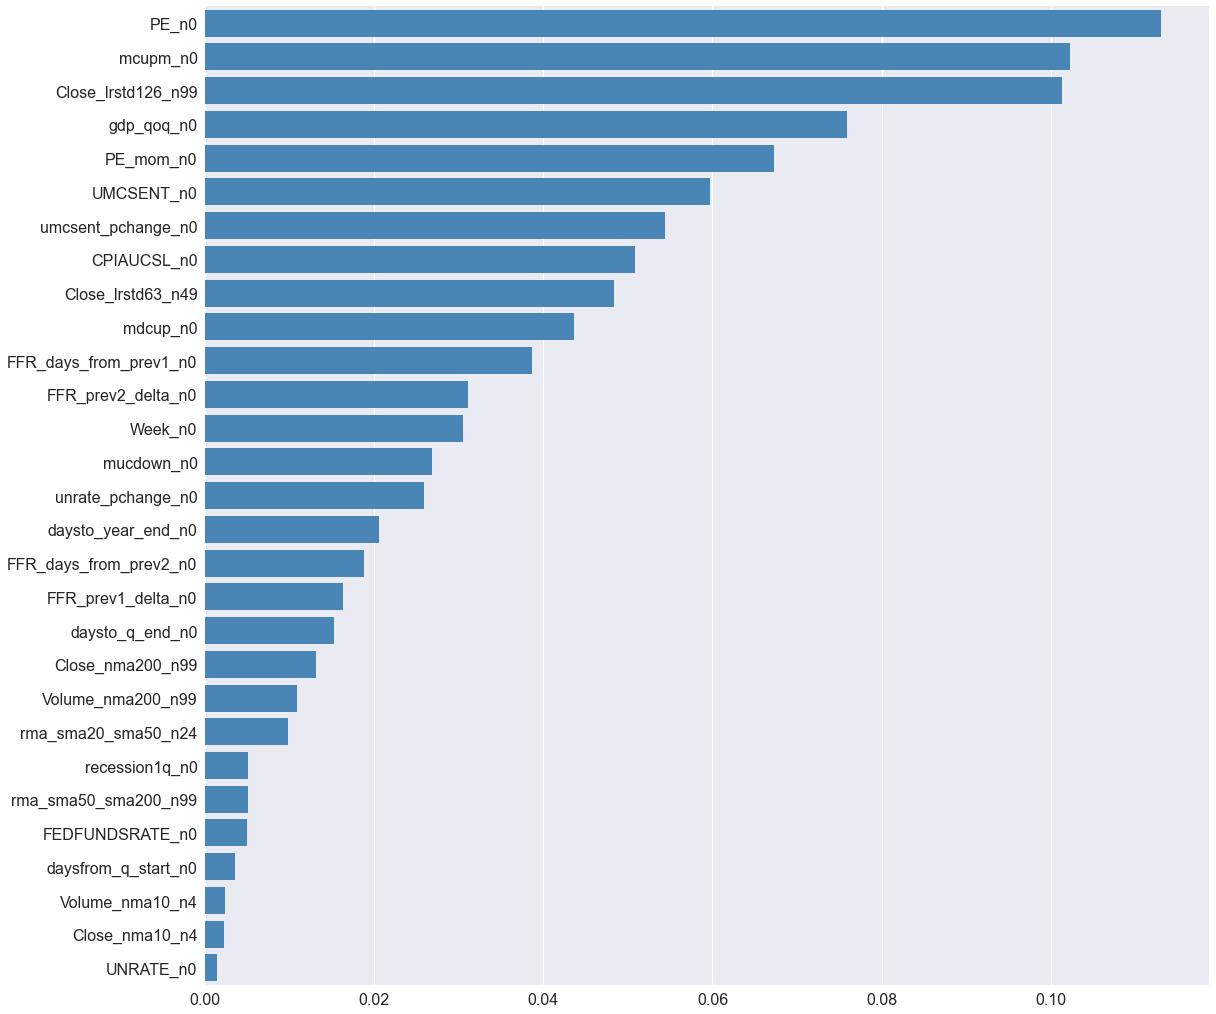

,PE_n0,mcupm_n0,Close_lrstd126_n99,gdp_qoq_n0,PE_mom_n0,UMCSENT_n0,umcsent_pchange_n0,CPIAUCSL_n0,Close_lrstd63_n49,mdcup_n0,FFR_days_from_prev1_n0,FFR_prev2_delta_n0,Week_n0,mucdown_n0,unrate_pchange_n0,daysto_year_end_n0,FFR_days_from_prev2_n0,FFR_prev1_delta_n0,daysto_q_end_n0,Close_nma200_n99,Volume_nma200_n99,rma_sma20_sma50_n24,recession1q_n0,rma_sma50_sma200_n99,FEDFUNDSRATE_n0,daysfrom_q_start_n0,Volume_nma10_n4,Close_nma10_n4,UNRATE_n0
value,0.113011,0.102301,0.1013,0.07594,0.067241,0.059734,0.054365,0.050874,0.048335,0.0437,0.038736,0.031092,0.030561,0.026827,0.025884,0.020597,0.018884,0.016374,0.015243,0.013153,0.010964,0.009808,0.005142,0.005104,0.004977,0.003583,0.002458,0.002348,0.001463


In [223]:
%run ../matplot_helpers/matplot_helpers


# Plot the Bar Plot
figsize=[18,18]
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=figsize)
#barplot(importances,names, ax)

df_importances = pd.DataFrame(clf.feature_importances_, index = dfTrain.columns, columns=['value'])
df_importances = df_importances.sort_values('value',ascending=False)
bar_names = df_importances.index
bar_values = 'value'
simple_barplot(df_importances, bar_names, bar_values, ax,  bar_orientation='h')
plt.show()

# Print Importances
df_importances.T



# Confusion Matrix

* to re-iterate the confusion matrix below illustrates the very poor performance of the classifier
* predicting on a new Bear that it has not seen previosly is poor
* the model does generalize well 
* the precision tp /(tp + fp) = 1 ... so when predicts positive (ie., Bear) it is correct, but the recall is poor
* **HOWEVER** dspite the poor predictive performance below it is shown that trading on the MCUPM is effective.

In [17]:
# Confusion Matrix "p"
%run fmml   

dfTR_tmp = dfTR.copy()
# Remove the last prediction in the case you are predicting one day forward ... since there is no truth for comparison
remove_last = True
if remove_last == True:
    dfTR_tmp.drop(dfTR_tmp.tail(1).index, inplace=True)

(accuracy,precision,recall,fscore,dfcma,dfcmr,tp,fp,tn,fn)=fmclfperformance(dfTR_tmp,'y_1','p_1')

display(dfTR_tmp.tail(10)[['y_1','p_1']])

,Predicted Positive,Predicted Negative,Totals
actual Positive,14,319,333
actual Negative,0,48,48


posvalue =  0 negvalue = 1
accuracy = 0.163
errors = 319
total samples = 381
precision (tp /(tp + fp))= 1.000
recall tp /(tp + fn) = 0.042
fscore = 2*precision*recall / (precision + recall) =  0.081
tp = 14 fp = 0 tn = 48 fn = 319


,y_1,p_1
date,,
2009-03-18,1.0,1.0
2009-03-19,1.0,1.0
2009-03-20,1.0,1.0
2009-03-23,1.0,1.0
2009-03-24,1.0,1.0
2009-03-25,1.0,1.0
2009-03-26,1.0,1.0
2009-03-27,1.0,1.0
2009-03-30,1.0,1.0


# 2022 Inflation, Market, and Market Predictions - near bear market 5/20

* S&P trades near Bear territory May 20, 2022
* Black line shows the Bear market point \$3837 
* Intra day trading crossed below \$3837 on Friday, May 20
* https://www.statista.com/statistics/187616/effective-rate-of-us-federal-funds-monthly/ - until March 2022 when it was increased to 0.2 percent. As of April 2022, U.S. federal funds effective rate stood at 0.33 percent.
* May 3 , 2022 meeting - The fed raised interest rates by 0.5 % (biggest increase in 20 years) in its May 3-4 meeting and sent the market down with fear of increased inflation
* https://www.google.com/search?q=fed+interest+rate+announcement&rlz=1C5CHFA_enUS819US819&oq=Fed+inteest+rate&aqs=chrome.8.69i57j0i10i433l2j0i10j0i10i433j0i10l2j0i10i433j0i10j0i10i433.17605j1j7&sourceid=chrome&ie=UTF-8

In [18]:
s = dt.datetime(2021,1,1)
e = dt.datetime(2021,12,31)

mkt_high_2021=dfMLXY.loc[s:e]['Close'].max()
print(f'2021 market high = {mkt_high_2021}')

s = dt.datetime(2020,1,1)
e = dt.datetime(2022,12,31)
mkt_high_2022=dfMLXY.loc[s:e]['Close'].max()
bear_price = 0.8 * mkt_high_2022
print(f'2022 market high = {mkt_high_2022}, bear price = {bear_price }')

s = dt.datetime(2022,4,29)
e = dt.datetime(2022,4,30)
mkt_4_29=dfMLXY.loc[s:e]['Close'].max()
print(f'S&P end of April = {mkt_4_29}')


2021 market high = 4793.06005859375
2022 market high = 4796.56005859375, bear price = 3837.248046875
S&P end of April = 4131.93017578125


# Bull, Bear Trading - MCUPM (20% down sell, 20% up buy)

In [19]:
display(dfXY.head())


display(dfxyp.head())

,Month,mcupm,mucdown,mdcup,PE,PE_mom,Earnings_mom,FEDFUNDSRATE,gdp_qoq,recession1q,recession2q,UNRATE,unrate_pchange,CPIAUCSL,cpimom,UMCSENT,umcsent_pchange,Close_nma1,Volume_nma1,Close_nma5,Volume_nma5,Close_nma10,Volume_nma10,Close_nma15,Volume_nma15,Close_nma20,Volume_nma20,Close_nma30,Volume_nma30,Close_nma50,Volume_nma50,Close_nma200,Volume_nma200,rma_sma50_sma200,rma_sma20_sma50,PDI50,NDI50,ADX,Close_lrstd25,Close_lrstd63,Close_lrstd126,Close_lrstd25_avgvel5,Close_lrstd63_avgvel5,Close_lrstd126_avgvel5,Week,Day,Dayofweek,Quarter,daysfrom_q_start,daysto_q_end,daysto_year_end,daysfrom_year_start,FFR_id,FFR_prev1,FFR_prev1_date,FFR_prev2_date,FFR_prev2,FFR_prev1_delta,FFR_prev2_delta,FFR_days_from_prev1,FFR_days_from_prev2,y
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1955-01-01,1,1.0,0.000000,0.0,12.62,0.027687,0.040398,1.39,0.03337,0.0,0.0,4.9,-0.02,26.77,0.0,87.0,0.049457,0.000000,0.000000,0.005146,0.064545,0.000196,0.010341,0.002737,0.018979,0.002157,0.008030,0.002478,0.010950,0.002270,0.021969,0.001496,0.015769,0.103580,0.035326,67.846367,32.153633,31.135684,0.008795,0.007370,0.006617,-0.000031,0.000007,-0.000019,52,1,5,1,0,89,364,0,1272.0,1.28,1954-12-01,1954-11-01,0.83,0.11,0.45,31.0,61.0,1.0
1955-01-03,1,1.0,0.000000,0.0,12.62,0.027687,0.040398,1.39,0.03337,0.0,0.0,4.9,-0.02,26.77,0.0,87.0,0.049457,0.021401,0.190104,0.007373,0.056102,0.003978,0.028279,0.004105,0.041909,0.002835,0.015293,0.003181,0.021064,0.002723,0.026275,0.001638,0.015664,0.104760,0.035439,72.144500,27.855500,31.651500,0.009610,0.007754,0.006846,0.000103,0.000068,0.000019,1,3,0,1,2,87,362,2,1272.0,1.28,1954-12-01,1954-11-01,0.83,0.11,0.45,32.0,62.0,1.0
1955-01-04,1,1.0,0.008980,0.0,12.62,0.027687,0.040398,1.39,0.03337,0.0,0.0,4.9,-0.02,26.77,0.0,87.0,0.049457,-0.008980,-0.032823,0.003827,0.007461,0.002939,0.028711,0.003969,0.042145,0.002156,0.015419,0.002752,0.021354,0.002543,0.027688,0.001618,0.016142,0.105758,0.035034,68.084748,31.915252,31.828676,0.009625,0.007867,0.006910,0.000089,0.000081,0.000035,1,4,1,1,3,86,361,3,1272.0,1.28,1954-12-01,1954-11-01,0.83,0.11,0.45,33.0,63.0,1.0
1955-01-05,1,1.0,0.033469,0.0,12.62,0.027687,0.040398,1.39,0.03337,0.0,0.0,4.9,-0.02,26.77,0.0,87.0,0.049457,-0.024712,0.049774,-0.001115,0.055339,0.000581,0.038371,0.001914,0.043199,0.001007,0.013589,0.001482,0.015347,0.002155,0.026183,0.001504,0.016864,0.106433,0.033844,58.707247,41.292753,31.263414,0.010936,0.008552,0.007288,0.000406,0.000229,0.000111,1,5,2,1,4,85,360,4,1272.0,1.28,1954-12-01,1954-11-01,0.83,0.11,0.45,34.0,64.0,1.0
1955-01-06,1,1.0,0.046531,0.0,12.62,0.027687,0.040398,1.39,0.03337,0.0,0.0,4.9,-0.02,26.77,0.0,87.0,0.049457,-0.013513,0.142241,-0.005161,0.069859,-0.000856,0.056930,0.000300,0.036867,0.000575,0.030942,0.000845,0.017378,0.001897,0.031849,0.001410,0.018070,0.106921,0.032485,54.537539,45.462461,30.393284,0.011324,0.008746,0.007407,0.000479,0.000275,0.000147,1,6,3,1,5,84,359,5,1272.0,1.28,1954-12-01,1954-11-01,0.83,0.11,0.45,35.0,65.0,1.0


,Close,Volume,High,Low,PE,Earnings,mkt,mcnr,mcupm_n0,mucdown_n0,mdcup_n0,recession1q_n0,Week_n0,daysto_q_end_n0,daysfrom_q_start_n0,daysto_year_end_n0,PE_n0,FEDFUNDSRATE_n0,UNRATE_n0,CPIAUCSL_n0,Close_lrstd63_n49,Close_lrstd126_n99,UMCSENT_n0,rma_sma50_sma200_n99,rma_sma20_sma50_n24,FFR_days_from_prev1_n0,FFR_days_from_prev2_n0,FFR_prev1_delta_n0,FFR_prev2_delta_n0,umcsent_pchange_n0,unrate_pchange_n0,PE_mom_n0,gdp_qoq_n0,Close_nma10_n4,Volume_nma10_n4,Close_nma200_n99,Volume_nma200_n99,y_1,p_1,model_date,p,p_s_1,p_s
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2007-10-09,1565.150024,2.932040e+09,1565.260010,1551.819946,20.68,74.808513,1.0,0.962078,1.0,0.000000,0.0,0.0,0.788462,0.912088,0.087912,0.227397,0.247244,0.045714,0.042553,0.696614,0.484245,0.115044,0.118779,0.566578,0.147333,0.106805,0.732866,-0.359494,-0.157412,-0.556483,-0.020056,1.176397,-0.405607,0.126932,-0.466596,0.879274,-0.161708,0.0,1.0,2007-10-08,NaN,1.0,NaN
2007-10-10,1562.469971,3.044760e+09,1565.420044,1555.459961,20.68,74.808513,-1.0,-0.001712,1.0,0.001712,0.0,0.0,0.788462,0.901099,0.098901,0.224658,0.247244,0.051429,0.047872,0.696614,0.484245,0.115044,0.118779,0.571988,0.147677,0.106524,0.735095,-0.359494,-0.157412,-0.556483,-0.020056,1.176397,-0.405607,0.419340,-0.315903,0.900235,-0.079979,0.0,1.0,2007-10-09,1.0,1.0,1.0
2007-10-11,1554.410034,3.911260e+09,1576.089966,1546.719971,20.68,74.808513,-1.0,-0.006862,1.0,0.006862,0.0,0.0,0.788462,0.890110,0.109890,0.221918,0.247244,0.057143,0.053191,0.696614,0.484245,0.115044,0.118779,0.574901,0.161917,0.104728,0.737138,-0.359494,-0.157412,-0.556483,-0.020056,1.176397,-0.405607,0.583223,-0.536174,0.818308,-0.068384,0.0,1.0,2007-10-09,1.0,1.0,1.0
2007-10-12,1561.800049,2.788690e+09,1563.030029,1554.089966,20.68,74.808513,-1.0,-0.002140,1.0,0.002140,0.0,0.0,0.788462,0.879121,0.120879,0.219178,0.247244,0.062857,0.058511,0.696614,0.484245,0.115044,0.118779,0.577757,0.173646,0.105008,0.739019,-0.359494,-0.157412,-0.556483,-0.020056,1.176397,-0.405607,0.650744,-0.746585,0.756135,-0.207121,0.0,1.0,2007-10-09,1.0,1.0,1.0
2007-10-15,1548.709961,3.139290e+09,1564.739990,1540.810059,20.68,74.808513,-1.0,-0.010504,1.0,0.010504,0.0,0.0,0.807692,0.846154,0.153846,0.210959,0.247244,0.068571,0.063830,0.696614,0.484245,0.115044,0.118779,0.587334,0.174212,0.103674,0.740738,-0.359494,-0.157412,-0.556483,-0.020056,1.176397,-0.405607,0.930067,-0.166635,0.710192,-0.201801,0.0,1.0,2007-10-09,1.0,1.0,1.0


#### Anticipating Market Bottom and Rentry after Market Bottom

In [153]:
%run fmtransforms.py

dfa = market_anticipation(dfMLXY, p_1='mcupm',  t1=dt.datetime(1950,1,3),  verbose=False)
display(dfa)

,Date_Mkt_High,Date_Sell,Date_Mkt_Low,Date_Buy,Mkt_High_Price,Sell_Price,Mkt_Low_Price,Buy_Price,Gain_Loss,Percent_Gain_Loss,Anticipation_Sell,Reaction_Buy,Out_Of_Market
0,1956-08-02,1957-10-18,1957-10-22,1958-07-25,49.639999,40.330002,38.980000,46.970001,-6.639999,-0.164642,2,196,198
1,1961-12-12,1962-05-25,1962-06-26,1962-12-06,72.639999,59.470001,52.320000,62.930000,-3.459999,-0.058181,21,116,137
2,1966-02-09,1966-08-26,1966-10-07,1967-02-14,94.059998,76.410004,73.199997,88.169998,-11.759994,-0.153906,30,89,119
3,1968-12-01,1970-01-28,1970-05-26,1970-09-25,108.370003,86.790001,69.290001,82.830002,3.959999,0.045627,84,87,171
4,1973-01-11,1973-11-26,1974-10-03,1974-11-04,120.239998,96.580002,62.279999,73.080002,23.500000,0.243322,220,22,242
5,1980-11-28,1982-02-19,1982-08-12,1982-09-14,140.520004,113.220001,102.419998,123.099998,-9.879997,-0.087264,123,22,145
6,1987-08-25,1987-10-16,1987-12-04,1988-03-16,336.769989,282.700012,223.919998,268.649994,14.050018,0.049699,35,71,106
7,2000-03-24,2001-03-09,2001-09-21,2001-12-04,1527.459961,1233.420044,965.799988,1144.800049,88.619995,0.071849,137,52,189
8,2002-01-04,2002-07-09,2002-07-23,2002-08-21,1172.510010,952.830017,797.700012,949.359985,3.470032,0.003642,10,21,31
9,2007-10-09,2008-07-08,2008-11-20,2008-12-05,1565.150024,1273.699951,752.440002,876.070007,397.629944,0.312185,98,10,108


### Covid Bear

,Date_Mkt_High,Date_Sell,Date_Mkt_Low,Date_Buy,Mkt_High_Price,Sell_Price,Mkt_Low_Price,Buy_Price,Anticipation_Sell,Reaction_Buy
10,2020-02-19,2020-03-11,2020-03-23,2020-04-07,3386.149902,2741.379883,2237.399902,2659.409912,8,11


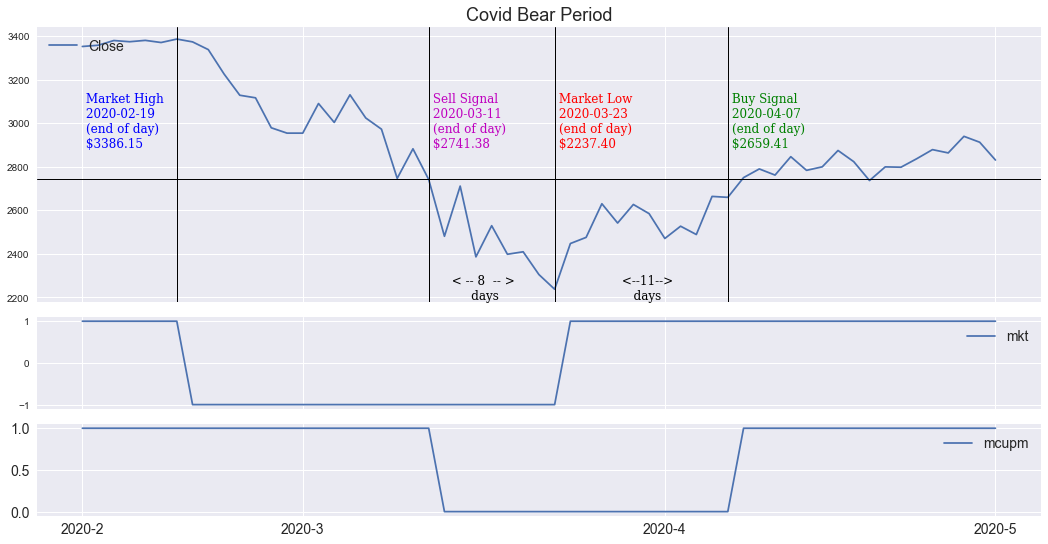

In [130]:
# COVID BEAR
%run fmtransforms

market_high_date=dt.datetime(2020,2,19) # market high prior to COVID Bear
df_mcycle,d1,p1, d2, p2, d3, p3, d4, p4, anticipation_sell, reaction_buy=bear_buysell_summary(dfa,market_high_date)


s,e = dt.datetime(2020,2,10),dt.datetime(2020,5,1)

vlines=[(d1,d2,d3,d4),'','','']
hlines=[p2,'','']

bear_annotations = [ [(dt.datetime(2020,2,1),2900,f' Market High\n {d1}\n (end of day)\n ${p1:.2f}','b',12) , 
                            (d2,2900,f' Sell Signal\n {d2}\n (end of day)\n ${p2:.2f}','m',12),
                            (d3,2900,f' Market Low\n {d3}\n (end of day)\n ${p3:.2f}','r',12),
                            (d4,2900,f' Buy Signal\n {d4}\n (end of day)\n ${p4:.2f}','g',12), 
                            (dt.datetime(2020,3,12),2200,f'  < -- {anticipation_sell}  -- >\n       days','k',12),
                            (dt.datetime(2020,3,28),2200,f' <--{reaction_buy}-->\n    days','k',12),
                            ] 
                            ,'','',''  ]

display(df_mcycle)

fmplot(dfMLXY.loc[s:e],['Close','mkt','mcupm'], plottypes =['line','line','line'],
       startdate=s, enddate=e, sharex=True, llocs=['upper left', 'upper right','upper right'],
       titles = ['Covid Bear Period','',''], title_fontsize=18,
       figsize=(18,9),ytick_labelsize=14, xtick_labelsize=14, 
       vlines = vlines, hlines=hlines, annotations = bear_annotations,
       legend_fontsize=14, height_ratios=(3,1,1))


### 2007 - 2008 Financial Crisis

,Date_Mkt_High,Date_Sell,Date_Mkt_Low,Date_Buy,Mkt_High_Price,Sell_Price,Mkt_Low_Price,Buy_Price,Anticipation_Sell,Reaction_Buy
8,2007-10-09,2008-07-08,2008-11-20,2008-12-05,1565.150024,1273.699951,752.440002,876.070007,98,10


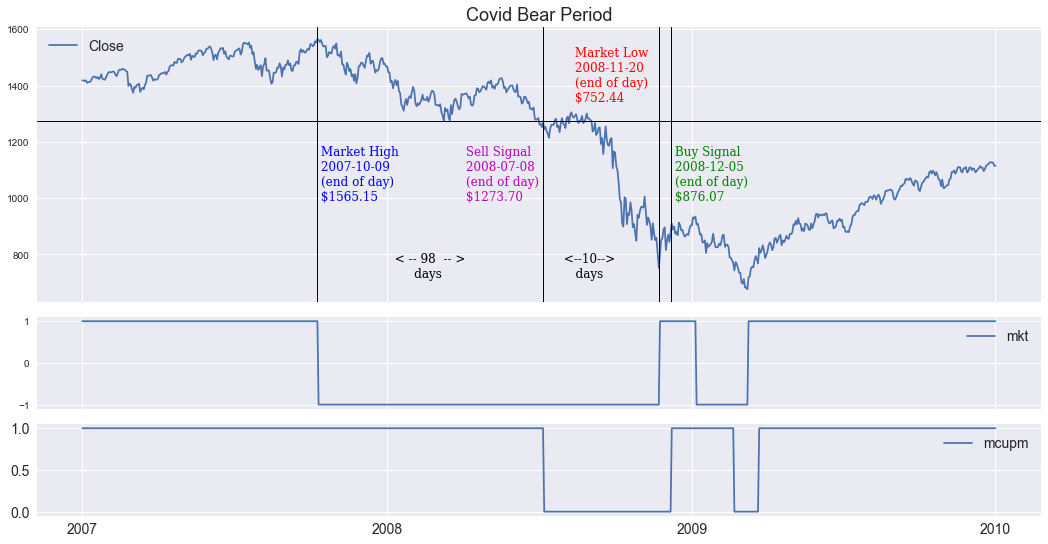

In [124]:
# 2007-2008 Financial Crisis
%run fmtransforms

market_high_date=dt.datetime(2007,10,9) # market high prior to COVID Bear
df_mcycle,d1,p1, d2, p2, d3, p3, d4, p4, anticipation_sell, reaction_buy=bear_buysell_summary(dfa,market_high_date)


s,e = dt.datetime(2007,1,1),dt.datetime(2010,1,1)

vlines=[(d1,d2,d3,d4),'','','']
hlines=[p2,'','']

bear_annotations = [ [(d1,1000,f' Market High\n {d1}\n (end of day)\n ${p1:.2f}','b',12) , 
                            (dt.datetime(2008,4,1),1000,f' Sell Signal\n {d2}\n (end of day)\n ${p2:.2f}','m',12),
                            (dt.datetime(2008,8,10),1350,f' Market Low\n {d3}\n (end of day)\n ${p3:.2f}','r',12),
                            (d4,1000,f' Buy Signal\n {d4}\n (end of day)\n ${p4:.2f}','g',12), 
                            (dt.datetime(2008,1,1),725,f'  < -- {anticipation_sell}  -- >\n       days','k',12),
                            (dt.datetime(2008,7,28),725,f' <--{reaction_buy}-->\n    days','k',12),
                            ] 
                            ,'','',''  ]

display(df_mcycle)

fmplot(dfMLXY.loc[s:e],['Close','mkt','mcupm'], plottypes =['line','line','line'],
       startdate=s, enddate=e, sharex=True, llocs=['upper left', 'upper right','upper right'],
       titles = ['Covid Bear Period','',''], title_fontsize=18,
       figsize=(18,9),ytick_labelsize=14, xtick_labelsize=14, 
       vlines = vlines, hlines=hlines, annotations = bear_annotations,
       legend_fontsize=14, height_ratios=(3,1,1))


## 2007-2008 FInancial Crisis Part 2

,Date_Mkt_High,Date_Sell,Date_Mkt_Low,Date_Buy,Mkt_High_Price,Sell_Price,Mkt_Low_Price,Buy_Price,Anticipation_Sell,Reaction_Buy
9,2009-01-06,2009-02-20,2009-03-09,2009-03-20,934.700012,770.049988,676.530029,768.539978,12,9


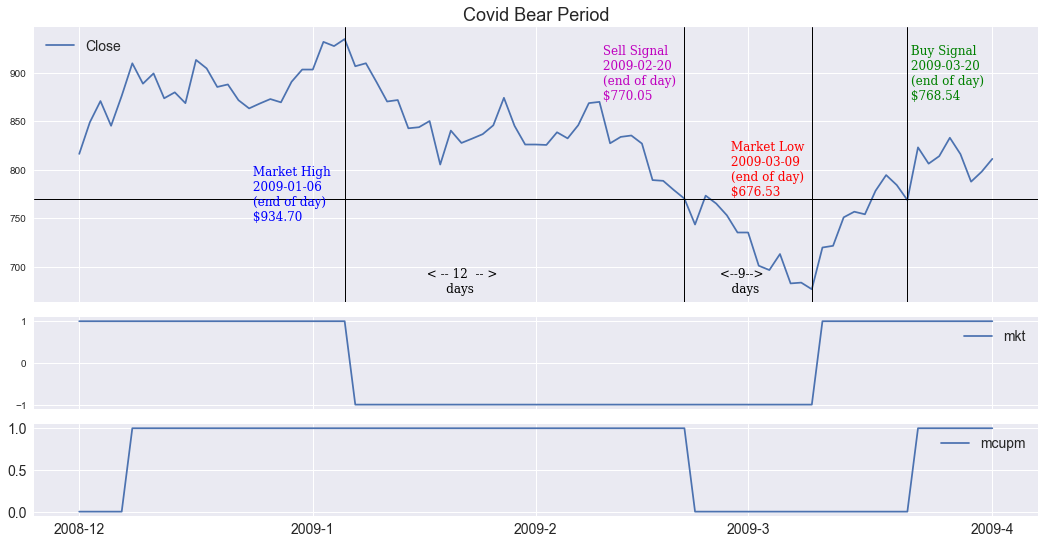

In [125]:
# 2007-2008 Financial Crisis Part 2
%run fmtransforms

market_high_date=dt.datetime(2009,1,6) # market high prior to COVID Bear
df_mcycle,d1,p1, d2, p2, d3, p3, d4, p4, anticipation_sell, reaction_buy=bear_buysell_summary(dfa,market_high_date)


s,e = dt.datetime(2008,12,1),dt.datetime(2009,4,1)

vlines=[(d1,d2,d3,d4),'','','']
hlines=[p2,'','']

bear_annotations = [ [(dt.datetime(2008,12,23),750,f' Market High\n {d1}\n (end of day)\n ${p1:.2f}','b',12) , 
                            (dt.datetime(2009,2,8),875,f' Sell Signal\n {d2}\n (end of day)\n ${p2:.2f}','m',12),
                            (dt.datetime(2009,2,26),775,f' Market Low\n {d3}\n (end of day)\n ${p3:.2f}','r',12),
                            (d4,875,f' Buy Signal\n {d4}\n (end of day)\n ${p4:.2f}','g',12), 
                            (dt.datetime(2009,1,15), 675,f'  < -- {anticipation_sell}  -- >\n       days','k',12),
                            (dt.datetime(2009,2,25),675,f' <--{reaction_buy}-->\n    days','k',12),
                            ] 
                            ,'','',''  ]

display(df_mcycle)

fmplot(dfMLXY.loc[s:e],['Close','mkt','mcupm'], plottypes =['line','line','line'],
       startdate=s, enddate=e, sharex=True, llocs=['upper left', 'upper right','upper right'],
       titles = ['Covid Bear Period','',''], title_fontsize=18,
       figsize=(18,9),ytick_labelsize=14, xtick_labelsize=14, 
       vlines = vlines,  hlines = hlines,annotations = bear_annotations,
       legend_fontsize=14, height_ratios=(3,1,1))


# BACKTEST

In [161]:
filename_mcsummary = './data/GSPC_dfmcs2020.5_1950_2022-6-8.csv'
df_mcsummary= pd.read_csv(filename_mcsummary,index_col=0,parse_dates=True)
display(df_mcsummary)

,mkt,startDate,endDate,mcnr,startPrice,endPrice
1950-01-03,1.0,1950-01-03,1956-08-02,1.979592,16.660000,49.639999
1956-08-02,-1.0,1956-08-02,1957-10-22,-0.214746,49.639999,38.980000
1957-10-22,1.0,1957-10-22,1961-12-12,0.863520,38.980000,72.639999
1961-12-12,-1.0,1961-12-12,1962-06-26,-0.279736,72.639999,52.320000
1962-06-26,1.0,1962-06-26,1966-02-09,0.797783,52.320000,94.059998
1966-02-09,-1.0,1966-02-09,1966-10-07,-0.221773,94.059998,73.199997
1966-10-07,1.0,1966-10-07,1968-11-29,0.480465,73.199997,108.370003
1968-11-29,-1.0,1968-11-29,1970-05-26,-0.360616,108.370003,69.290001
1970-05-26,1.0,1970-05-26,1973-01-11,0.735315,69.290001,120.239998
1973-01-11,-1.0,1973-01-11,1974-10-03,-0.482036,120.239998,62.279999


In [159]:
display(dfa)

,Date_Mkt_High,Date_Sell,Date_Mkt_Low,Date_Buy,Mkt_High_Price,Sell_Price,Mkt_Low_Price,Buy_Price,Gain_Loss,Percent_Gain_Loss,Anticipation_Sell,Reaction_Buy,Out_Of_Market
0,1956-08-02,1957-10-18,1957-10-22,1958-07-25,49.639999,40.330002,38.980000,46.970001,-6.639999,-0.164642,2,196,198
1,1961-12-12,1962-05-25,1962-06-26,1962-12-06,72.639999,59.470001,52.320000,62.930000,-3.459999,-0.058181,21,116,137
2,1966-02-09,1966-08-26,1966-10-07,1967-02-14,94.059998,76.410004,73.199997,88.169998,-11.759994,-0.153906,30,89,119
3,1968-12-01,1970-01-28,1970-05-26,1970-09-25,108.370003,86.790001,69.290001,82.830002,3.959999,0.045627,84,87,171
4,1973-01-11,1973-11-26,1974-10-03,1974-11-04,120.239998,96.580002,62.279999,73.080002,23.500000,0.243322,220,22,242
5,1980-11-28,1982-02-19,1982-08-12,1982-09-14,140.520004,113.220001,102.419998,123.099998,-9.879997,-0.087264,123,22,145
6,1987-08-25,1987-10-16,1987-12-04,1988-03-16,336.769989,282.700012,223.919998,268.649994,14.050018,0.049699,35,71,106
7,2000-03-24,2001-03-09,2001-09-21,2001-12-04,1527.459961,1233.420044,965.799988,1144.800049,88.619995,0.071849,137,52,189
8,2002-01-04,2002-07-09,2002-07-23,2002-08-21,1172.510010,952.830017,797.700012,949.359985,3.470032,0.003642,10,21,31
9,2007-10-09,2008-07-08,2008-11-20,2008-12-05,1565.150024,1273.699951,752.440002,876.070007,397.629944,0.312185,98,10,108


#### Backtest Dataframes from 1960 to 2022-5-27

In [141]:
display(dfxyp.head())

display(dfMLXY.head())

,Close,Volume,High,Low,PE,Earnings,mkt,mcnr,mcupm_n0,mucdown_n0,mdcup_n0,recession1q_n0,Week_n0,daysto_q_end_n0,daysfrom_q_start_n0,daysto_year_end_n0,PE_n0,FEDFUNDSRATE_n0,UNRATE_n0,CPIAUCSL_n0,Close_lrstd63_n49,Close_lrstd126_n99,UMCSENT_n0,rma_sma50_sma200_n99,rma_sma20_sma50_n24,FFR_days_from_prev1_n0,FFR_days_from_prev2_n0,FFR_prev1_delta_n0,FFR_prev2_delta_n0,umcsent_pchange_n0,unrate_pchange_n0,PE_mom_n0,gdp_qoq_n0,Close_nma10_n4,Volume_nma10_n4,Close_nma200_n99,Volume_nma200_n99,y_1,p_1,model_date,p,p_s_1,p_s
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2007-10-09,1565.150024,2.932040e+09,1565.260010,1551.819946,20.68,74.808513,1.0,0.962078,1.0,0.000000,0.0,0.0,0.788462,0.912088,0.087912,0.227397,0.247244,0.045714,0.042553,0.696614,0.484245,0.115044,0.118779,0.566578,0.147333,0.106805,0.732866,-0.359494,-0.157412,-0.556483,-0.020056,1.176397,-0.405607,0.126932,-0.466596,0.879274,-0.161708,0.0,1.0,2007-10-08,NaN,1.0,NaN
2007-10-10,1562.469971,3.044760e+09,1565.420044,1555.459961,20.68,74.808513,-1.0,-0.001712,1.0,0.001712,0.0,0.0,0.788462,0.901099,0.098901,0.224658,0.247244,0.051429,0.047872,0.696614,0.484245,0.115044,0.118779,0.571988,0.147677,0.106524,0.735095,-0.359494,-0.157412,-0.556483,-0.020056,1.176397,-0.405607,0.419340,-0.315903,0.900235,-0.079979,0.0,1.0,2007-10-09,1.0,1.0,1.0
2007-10-11,1554.410034,3.911260e+09,1576.089966,1546.719971,20.68,74.808513,-1.0,-0.006862,1.0,0.006862,0.0,0.0,0.788462,0.890110,0.109890,0.221918,0.247244,0.057143,0.053191,0.696614,0.484245,0.115044,0.118779,0.574901,0.161917,0.104728,0.737138,-0.359494,-0.157412,-0.556483,-0.020056,1.176397,-0.405607,0.583223,-0.536174,0.818308,-0.068384,0.0,1.0,2007-10-09,1.0,1.0,1.0
2007-10-12,1561.800049,2.788690e+09,1563.030029,1554.089966,20.68,74.808513,-1.0,-0.002140,1.0,0.002140,0.0,0.0,0.788462,0.879121,0.120879,0.219178,0.247244,0.062857,0.058511,0.696614,0.484245,0.115044,0.118779,0.577757,0.173646,0.105008,0.739019,-0.359494,-0.157412,-0.556483,-0.020056,1.176397,-0.405607,0.650744,-0.746585,0.756135,-0.207121,0.0,1.0,2007-10-09,1.0,1.0,1.0
2007-10-15,1548.709961,3.139290e+09,1564.739990,1540.810059,20.68,74.808513,-1.0,-0.010504,1.0,0.010504,0.0,0.0,0.807692,0.846154,0.153846,0.210959,0.247244,0.068571,0.063830,0.696614,0.484245,0.115044,0.118779,0.587334,0.174212,0.103674,0.740738,-0.359494,-0.157412,-0.556483,-0.020056,1.176397,-0.405607,0.930067,-0.166635,0.710192,-0.201801,0.0,1.0,2007-10-09,1.0,1.0,1.0


,Month,Close,High,Low,Open,Volume,mkt,mcupm,mcnr,mucdown,mdcup,PE,PE_mom,Earnings,Earnings_mom,FEDFUNDSRATE,GDP,gdp_qoq,recession1q,recession2q,UNRATE,unrate_pchange,CPIAUCSL,cpimom,UMCSENT,umcsent_pchange,Close_nma1,Volume_nma1,Close_nma5,Volume_nma5,Close_nma10,Volume_nma10,Close_nma15,Volume_nma15,Close_nma20,Volume_nma20,Close_nma30,Volume_nma30,Close_nma50,Volume_nma50,Close_nma200,Volume_nma200,rma_sma50_sma200,rma_sma20_sma50,PDI50,NDI50,ADX,Close_lrstd25,Close_lrstd63,Close_lrstd126,Close_lrstd25_avgvel5,Close_lrstd63_avgvel5,Close_lrstd126_avgvel5,Week,Day,Dayofweek,Dayofyear,Quarter,q_first_date,q_last_date,daysfrom_q_start,daysto_q_end,year_end_date,daysto_year_end,year_start_date,daysfrom_year_start,FFR_id,FFR_prev1,FFR_prev1_date,FFR_prev2_date,FFR_prev2,FFR_prev1_delta,FFR_prev2_delta,FFR_days_from_prev1,FFR_days_from_prev2
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1955-01-01,1,35.980000,35.980000,35.980000,35.980000,3840000.0,1.0,1.0,1.159664,0.000000,0.0,12.62,0.027687,2.693344,0.040398,1.39,413.073,0.03337,0.0,0.0,4.9,-0.02,26.77,0.0,87.0,0.049457,0.000000,0.000000,0.005146,0.064545,0.000196,0.010341,0.002737,0.018979,0.002157,0.008030,0.002478,0.010950,0.002270,0.021969,0.001496,0.015769,0.103580,0.035326,67.846367,32.153633,31.135684,0.008795,0.007370,0.006617,-0.000031,0.000007,-0.000019,52,1,5,1,1,1955-01-01,1955-03-31,0,89,1955-12-31,364,1955-01-01,0,1272.0,1.28,1954-12-01,1954-11-01,0.83,0.11,0.45,31.0,61.0
1955-01-03,1,36.750000,36.750000,36.750000,36.750000,4570000.0,1.0,1.0,1.205882,0.000000,0.0,12.62,0.027687,2.693344,0.040398,1.39,413.073,0.03337,0.0,0.0,4.9,-0.02,26.77,0.0,87.0,0.049457,0.021401,0.190104,0.007373,0.056102,0.003978,0.028279,0.004105,0.041909,0.002835,0.015293,0.003181,0.021064,0.002723,0.026275,0.001638,0.015664,0.104760,0.035439,72.144500,27.855500,31.651500,0.009610,0.007754,0.006846,0.000103,0.000068,0.000019,1,3,0,3,1,1955-01-01,1955-03-31,2,87,1955-12-31,362,1955-01-01,2,1272.0,1.28,1954-12-01,1954-11-01,0.83,0.11,0.45,32.0,62.0
1955-01-04,1,36.419998,36.419998,36.419998,36.419998,4420000.0,1.0,1.0,1.186074,0.008980,0.0,12.62,0.027687,2.693344,0.040398,1.39,413.073,0.03337,0.0,0.0,4.9,-0.02,26.77,0.0,87.0,0.049457,-0.008980,-0.032823,0.003827,0.007461,0.002939,0.028711,0.003969,0.042145,0.002156,0.015419,0.002752,0.021354,0.002543,0.027688,0.001618,0.016142,0.105758,0.035034,68.084748,31.915252,31.828676,0.009625,0.007867,0.006910,0.000089,0.000081,0.000035,1,4,1,4,1,1955-01-01,1955-03-31,3,86,1955-12-31,361,1955-01-01,3,1272.0,1.28,1954-12-01,1954-11-01,0.83,0.11,0.45,33.0,63.0
1955-01-05,1,35.520000,35.520000,35.520000,35.520000,4640000.0,1.0,1.0,1.132053,0.033469,0.0,12.62,0.027687,2.693344,0.040398,1.39,413.073,0.03337,0.0,0.0,4.9,-0.02,26.77,0.0,87.0,0.049457,-0.024712,0.049774,-0.001115,0.055339,0.000581,0.038371,0.001914,0.043199,0.001007,0.013589,0.001482,0.015347,0.002155,0.026183,0.001504,0.016864,0.106433,0.033844,58.707247,41.292753,31.263414,0.010936,0.008552,0.007288,0.000406,0.000229,0.000111,1,5,2,5,1,1955-01-01,1955-03-31,4,85,1955-12-31,360,1955-01-01,4,1272.0,1.28,1954-12-01,1954-11-01,0.83,0.11,0.45,34.0,64.0
1955-01-06,1,35.040001,35.040001,35.040001,35.040001,5300000.0,1.0,1.0,1.103241,0.046531,0.0,12.62,0.027687,2.693344,0.040398,1.39,413.073,0.03337,0.0,0.0,4.9,-0.02,26.77,0.0,87.0,0.049457,-0.013513,0.142241,-0.005161,0.069859,-0.000856,0.056930,0.000300,0.036867,0.000575,0.030942,0.000845,0.017378,0.001897,0.031849,0.001410,0.018070,0.106921,0.032485,54.537539,45.462461,30.393284,0.011324,0.008746,0.007407,0.000479,0.000275,0.000147,1,6,3,6,1,1955-01-01,1955-03-31,5,84,1955-12-31,359,1955-01-01,5,1272.0,1.28,1954-12-01,1954-11-01,0.83,0.11,0.45,35.0,65.0


In [142]:
s,e=dt.datetime(1960,1,1),dt.datetime(2022,6,1)
price_variable = 'Close'
trade_variable = 'mcupm'
dftsummary,dfbt=fmbacktest(dfMLXY[s:e].copy(),price_variable,trade_variable)
dftsummary

,start_date,end_date,start_price,end_price,start_strategyvalue,end_strategyvalue,r,r_strategy
1960,1960-01-01,1961-01-01,59.889999,58.110001,59.889999,58.110001,-0.029721,-0.029721
1961,1961-01-01,1962-01-01,58.110001,71.550003,58.110001,71.550003,0.231286,0.231286
1962,1962-01-01,1962-12-31,71.550003,63.099998,71.550003,59.630652,-0.118099,-0.166588
1963,1963-01-01,1963-12-31,63.099998,75.019997,59.630652,70.895269,0.188906,0.188906
1964,1964-01-01,1964-12-31,75.019997,84.750000,70.895269,80.090300,0.129699,0.129699
1965,1965-01-01,1965-12-31,84.750000,92.430000,80.090300,87.348041,0.090619,0.090619
1966,1966-01-01,1967-01-01,92.430000,80.330002,87.348041,72.208851,-0.130910,-0.173320
1967,1967-01-01,1968-01-01,80.330002,96.470001,72.208851,79.006330,0.200921,0.094136
1968,1968-01-01,1968-12-31,96.470001,103.860001,79.006330,85.058541,0.076604,0.076604
1969,1969-01-01,1969-12-31,103.860001,92.059998,85.058541,75.394656,-0.113615,-0.113615


# BACKTEST 2020 - 2022

In [155]:
%run fmml
price_variable='Close'
s,e=dt.datetime(2020,1,1),dt.datetime(2022,6,1)
trade_variable = 'mcupm'
dftsummary_2020_2022,dfbt_2020_2022=fmbacktest(dfMLXY[s:e].copy(),price_variable,trade_variable)
display(dfbt_2020_2022.head())
display(dftsummary_2020_2022.tail())
dftsummary_2020_2022.T

,Month,Close,High,Low,Open,Volume,mkt,mcupm,mcnr,mucdown,mdcup,PE,PE_mom,Earnings,Earnings_mom,FEDFUNDSRATE,GDP,gdp_qoq,recession1q,recession2q,UNRATE,unrate_pchange,CPIAUCSL,cpimom,UMCSENT,umcsent_pchange,Close_nma1,Volume_nma1,Close_nma5,Volume_nma5,Close_nma10,Volume_nma10,Close_nma15,Volume_nma15,Close_nma20,Volume_nma20,Close_nma30,Volume_nma30,Close_nma50,Volume_nma50,Close_nma200,Volume_nma200,rma_sma50_sma200,rma_sma20_sma50,PDI50,NDI50,ADX,Close_lrstd25,Close_lrstd63,Close_lrstd126,Close_lrstd25_avgvel5,Close_lrstd63_avgvel5,Close_lrstd126_avgvel5,Week,Day,Dayofweek,Dayofyear,Quarter,q_first_date,q_last_date,daysfrom_q_start,daysto_q_end,year_end_date,daysto_year_end,year_start_date,daysfrom_year_start,FFR_id,FFR_prev1,FFR_prev1_date,FFR_prev2_date,FFR_prev2,FFR_prev1_delta,FFR_prev2_delta,FFR_days_from_prev1,FFR_days_from_prev2,Close_R,Close_strategyvalue
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-01,1,3230.780029,3231.719971,3212.030029,3215.179932,2.893810e+09,1.0,1.0,3.775516,0.002852,0.0,24.21,0.070292,133.448163,-0.015753,1.55,21561.139,-0.007731,1.0,0.0,3.6,0.028571,258.82,0.001455,99.8,0.005035,0.000000,0.000000,0.000465,0.198318,0.001197,0.059708,0.002067,0.050968,0.002185,0.034098,0.001171,0.040662,0.001518,0.025973,0.000742,0.016188,0.052518,0.018922,34.525185,19.987284,20.814081,0.004576,0.005090,0.007843,-0.000003,-0.000175,-0.000007,1,1,2,1,1,2020-01-01,2020-03-31,0,90,2020-12-31,365,2020-01-01,0,17883.0,1.83,2019-10-01,2019-09-01,2.04,-0.28,-0.21,73.0,103.0,0.000000,3230.780029
2020-01-02,1,3257.850098,3258.139893,3235.530029,3244.669922,3.458250e+09,1.0,1.0,3.815529,0.000000,0.0,24.21,0.070292,133.448163,-0.015753,1.55,21561.139,-0.007731,1.0,0.0,3.6,0.028571,258.82,0.001455,99.8,0.005035,0.008379,0.195051,0.001116,0.104029,0.002078,0.074612,0.002432,0.065791,0.002288,0.043280,0.001576,0.043034,0.001628,0.030618,0.000789,0.018179,0.053408,0.019590,37.761220,18.944727,20.525571,0.004764,0.004911,0.007873,0.000047,-0.000203,0.000002,1,2,3,2,1,2020-01-01,2020-03-31,1,89,2020-12-31,364,2020-01-01,1,17883.0,1.83,2019-10-01,2019-09-01,2.04,-0.28,-0.21,74.0,104.0,0.008379,3257.850098
2020-01-03,1,3234.850098,3246.149902,3222.340088,3226.360107,3.461290e+09,1.0,1.0,3.781532,0.007060,0.0,24.21,0.070292,133.448163,-0.015753,1.55,21561.139,-0.007731,1.0,0.0,3.6,0.028571,258.82,0.001455,99.8,0.005035,-0.007060,0.000879,-0.000303,0.079399,0.000926,0.082015,0.001390,0.050720,0.001860,0.047915,0.001393,0.045660,0.001449,0.028869,0.000717,0.018347,0.054180,0.020002,35.275618,20.142699,21.249702,0.004943,0.004973,0.007896,0.000091,-0.000187,0.000007,1,3,4,3,1,2020-01-01,2020-03-31,2,88,2020-12-31,363,2020-01-01,2,17883.0,1.83,2019-10-01,2019-09-01,2.04,-0.28,-0.21,75.0,105.0,-0.007060,3234.850098
2020-01-06,1,3246.280029,3246.840088,3214.639893,3217.550049,3.674070e+09,1.0,1.0,3.798427,0.003551,0.0,24.21,0.070292,133.448163,-0.015753,1.55,21561.139,-0.007731,1.0,0.0,3.6,0.028571,258.82,0.001455,99.8,0.005035,0.003533,0.061474,0.001560,0.043551,0.000785,0.014682,0.001620,0.059058,0.001580,0.049145,0.001439,0.052133,0.001438,0.031843,0.000758,0.018491,0.054902,0.020146,33.212299,20.363259,22.059124,0.004958,0.004463,0.007899,0.000045,-0.000251,0.000008,2,6,0,6,1,2020-01-01,2020-03-31,5,85,2020-12-31,360,2020-01-01,5,17883.0,1.83,2019-10-01,2019-09-01,2.04,-0.28,-0.21,76.0,106.0,0.003533,3246.280029
2020-01-07,1,3237.179932,3244.909912,3232.429932,3241.860107,3.420380e+09,1.0,1.0,3.784976,0.006345,0.0,24.21,0.070292,133.448163,-0.015753,1.55,21561.139,-0.007731,1.0,0.0,3.6,0.028571,258.82,0.001455,99.8,0.005035,-0.002803,-0.069049,0.000410,0.037671,0.000418,0.060357,0.000957,0.048837,0.001598,0.047611,0.001095,0.046890,0.001270,0.029567,0.000726,0.018464,0.055483,0.020473,32.364812,19.843644,22.689547,0.004591,0.004403,0.007897,0.000003,-0.000149,0.000008,2,7,1,7,1,2020-01-01,2020-03-31,6,84,2020-12-31,359,2020-01-01,6,17883.0,1.83,2019-10-01,2019-09-01,2.04,-0.28,-0.21,77.0,

,start_date,end_date,start_price,end_price,start_strategyvalue,end_strategyvalue,r,r_strategy
2020,2020-01-01,2020-12-31,3230.780029,3756.070068,3230.780029,3871.841974,0.162589,0.198423
2021,2021-01-01,2021-12-31,3756.070068,4766.180176,3871.841974,4913.086318,0.268927,0.268927
2022,2022-01-01,2022-06-01,4766.180176,4101.229980,4913.086318,4227.640618,-0.139514,-0.139514


,2020,2021,2022
start_date,2020-01-01 00:00:00,2021-01-01 00:00:00,2022-01-01 00:00:00
end_date,2020-12-31 00:00:00,2021-12-31 00:00:00,2022-06-01 00:00:00
start_price,3230.78,3756.07,4766.18
end_price,3756.07,4766.18,4101.23
start_strategyvalue,3230.78,3871.84,4913.09
end_strategyvalue,3871.84,4913.09,4227.64
r,0.162589,0.268927,-0.139514
r_strategy,0.198423,0.268927,-0.139514


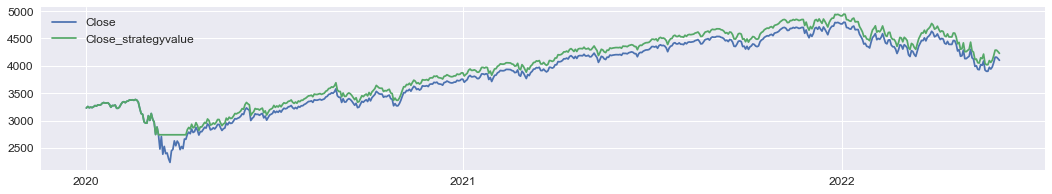

In [156]:
%run fmplot


s=dt.datetime(2020,1,1)
e=dt.datetime(2022,12,31)
variables=['Close','Close_strategyvalue']


fmplot(dfbt_2020_2022, figsize=(18,3), variables= [variables],
       startdate=s, enddate=e,  xlabelfontsize=16)

# BACKTEST 2000 - 2022

In [158]:
s,e=dt.datetime(2000,1,1),dt.datetime(2022,5,20)
trade_variable='mcupm'
dftsummary_2000_2022,dfbt_2000_2022=fmbacktest(dfMLXY[s:e].copy(),price_variable,trade_variable)
dftsummary_2000_2022

,start_date,end_date,start_price,end_price,start_strategyvalue,end_strategyvalue,r,r_strategy
2000,2000-01-01,2001-01-01,1469.250000,1320.280029,1469.250000,1320.280029,-0.101392,-0.101392
2001,2001-01-01,2001-12-31,1320.280029,1148.079956,1320.280029,1236.953852,-0.130427,-0.063113
2002,2002-01-01,2002-12-31,1148.079956,879.820007,1236.953852,951.392457,-0.233660,-0.230859
2003,2003-01-01,2003-12-31,879.820007,1111.920044,951.392457,1202.373592,0.263804,0.263804
2004,2004-01-01,2004-12-31,1111.920044,1211.920044,1202.373592,1310.508489,0.089935,0.089935
2005,2005-01-01,2006-01-01,1211.920044,1248.290039,1310.508489,1349.837146,0.030010,0.030010
2006,2006-01-01,2007-01-01,1248.290039,1418.300049,1349.837146,1533.677295,0.136194,0.136194
2007,2007-01-01,2007-12-31,1418.300049,1468.359985,1533.677295,1587.809555,0.035296,0.035296
2008,2008-01-01,2008-12-31,1468.359985,903.250000,1587.809555,1420.045174,-0.384858,-0.105658
2009,2009-01-01,2009-12-31,903.250000,1115.099976,1420.045174,1756.549737,0.234542,0.236968


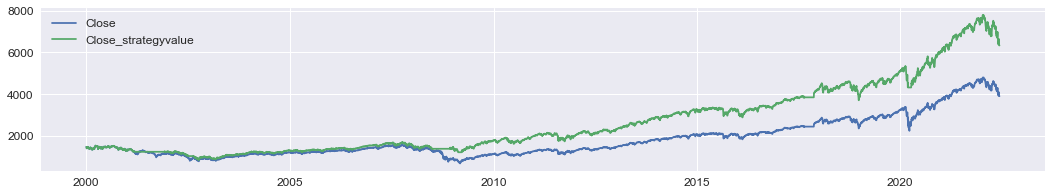

In [162]:
%run fmplot


s=dt.datetime(2000,1,1)
e=dt.datetime(2022,12,31)
variables=['Close','Close_strategyvalue']


fmplot(dfbt_2000_2022, figsize=(18,3), variables= [variables],
       startdate=s, enddate=e,  xlabelfontsize=16)

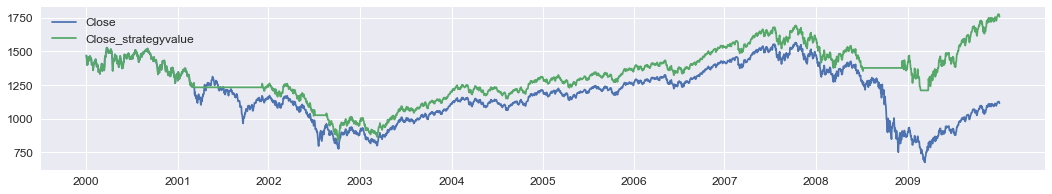

In [170]:
s=dt.datetime(2000,1,1)
e=dt.datetime(2009,12,31)
fmplot(dfbt_2000_2022, figsize=(18,3), variables= [variables],
       startdate=s, enddate=e,  xlabelfontsize=16)

# Backtest 1990 - 1999

In [168]:
s,e=dt.datetime(1990,1,1),dt.datetime(1999,12,31)
trade_variable='mcupm'
dftsummary_1990_1999,dfbt_1990_1999=fmbacktest(dfMLXY[s:e].copy(),price_variable,trade_variable)
dftsummary

,start_date,end_date,start_price,end_price,start_strategyvalue,end_strategyvalue,r,r_strategy
1990,1990-01-01,1990-12-31,353.399994,330.220001,353.399994,330.220001,-0.065591,-0.065591
1991,1991-01-01,1991-12-31,330.220001,417.089996,330.220001,417.089996,0.263067,0.263067
1992,1992-01-01,1992-12-31,417.089996,435.709991,417.089996,435.709991,0.044643,0.044643
1993,1993-01-01,1993-12-31,435.709991,466.450012,435.709991,466.450012,0.070552,0.070552
1994,1994-01-01,1995-01-01,466.450012,459.269989,466.450012,459.269989,-0.015393,-0.015393
1995,1995-01-01,1996-01-01,459.269989,615.929993,459.269989,615.929993,0.341107,0.341107
1996,1996-01-01,1996-12-31,615.929993,740.739990,615.929993,740.739990,0.202637,0.202637
1997,1997-01-01,1997-12-31,740.739990,970.429993,740.739990,970.429993,0.310082,0.310082
1998,1998-01-01,1998-12-31,970.429993,1229.229980,970.429993,1229.229980,0.266686,0.266686
1999,1999-01-01,1999-12-31,1229.229980,1469.250000,1229.229980,1469.250000,0.195260,0.195260


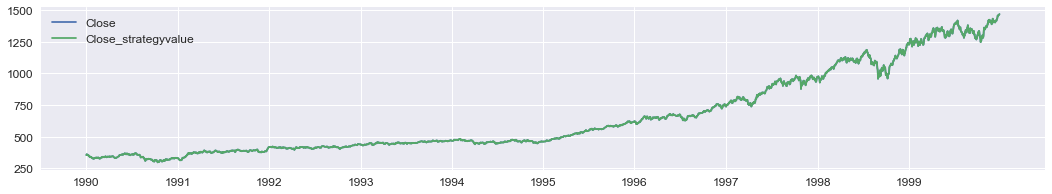

In [169]:
s,e=dt.datetime(1990,1,1),dt.datetime(1999,12,31)
fmplot(dfbt_1990_1999, figsize=(18,3), variables= [variables],
       startdate=s, enddate=e,  xlabelfontsize=16)